# Explanatory models of 10 Year Treasury Notes (2002-2021)

#### <font color='darkblue'>__1. Data and libaries import__</font> [(→ Link)](#data_import)
#### <font color='darkblue'>__2. Exploratory Data Analysis (EDA)__</font> [(→ Link)](#eda)
2.1 Adding new columns<br>
#### <font color='darkblue'>__3. Time Series Analysis__</font> [(→ Link)](#tsa)
##### <font color='black'>3.1 Testing for White Noise
##### <font color='black'>3.2 Testing for Stationary
##### <font color='black'>3.3 Decomposing the Time Series
##### <font color='black'>3.4 Create Train & Test set
##### <font color='black'>3.5 Moving-average
3.5.1 Moving-average forecast<br>
##### <font color='black'>3.6 Exponentially Weighted Moving Average
3.6.1 Exponentially Exponentially Weighted Moving Average forecast<br>
##### <font color='black'>3.7 Exponential Smoothing
3.7.1 Double Exponential Smoothing<br>
3.7.2 Triple Exponential Smoothing<br>
#### <font color='darkblue'>__4. Feature Selection__</font> [(→ Link)](#fs)
4.1 Correlation analysis<br>
4.2 Filter Method<br>
#### <font color='darkblue'>__5. Creating regression models with features from Filter Method__</font> [(→ Link)](#regression_fm)
##### <font color='black'>5.1 Linear Regression
5.1.1 Feature importance<br>
##### <font color='black'>5.2 Ridge
5.2.1 Rigde alpha 0.1<br>
5.2.2 Rigde alpha 1<br>
5.2.3 Rigde alpha 10<br>
5.2.4 Feature importance<br>
##### <font color='black'>5.3 LASSO Regression
5.3.1 Feature importance<br>
##### <font color='black'>5.4 ElasticNet
5.4.1 Feature importance<br>
##### <font color='black'>5.5 Decision Tree
5.5.1 Decision Tree max_depth 3<br>
5.5.2 Decision Tree max_depth 5<br>
5.5.3 Decision Tree max_depth 10<br>
5.5.4 Feature importance<br>
##### <font color='black'>5.6 Random Forest
5.6.1 Random Forest with 100 trees<br>
5.6.2 Random Forest with 500 trees<br>
5.6.3 Random Forest with 1000 trees<br>
5.6.4 Feature importance<br>
##### <font color='black'>5.7 XGBoost
5.7.1 XGBoost tree based<br>
5.7.2 XGBoost linear based<br>
5.7.3 Feature importance<br>
##### <font color='black'>5.8 Pipeline
#### <font color='darkblue'>__6. Creating Regression models with all the features__</font> [(→ Link)](#regression_all)
##### <font color='black'>6.1 Linear Regression
6.1.1 Feature importance<br>
##### <font color='black'>6.2 Ridge
6.2.1 Rigde alpha 0.1<br>
6.2.2 Rigde alpha 1<br>
6.2.3 Rigde alpha 10<br>
6.2.4 Feature importance<br>
##### <font color='black'>6.3 LASSO Regression
6.3.1 Feature importance<br>
##### <font color='black'>6.4 ElasticNet
6.4.1 Feature importance<br>
##### <font color='black'>6.5 Decision Tree
6.5.1 Decision Tree max_depth 3<br>
6.5.2 Decision Tree max_depth 5<br>
6.5.3 Decision Tree max_depth 10<br>
6.5.4 Feature importance<br>
##### <font color='black'>6.6 Random Forest<br>
6.6.1 Random Forest with 100 trees<br>
6.6.2 Random Forest with 500 trees<br>
6.6.3 Random Forest with 1000 trees<br>
6.6.4 Feature importance<br>
##### <font color='black'>6.7 XGBoost
6.7.1 XGBoost tree based<br>
6.7.2 XGBoost linear based<br>
6.7.3 Feature importance<br>
##### <font color='black'>6.8 Pipeline
<br>

## <a id='data_import'></a>
## 1. Data and libaries import

In [1]:
# Loading libraries
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pmdarima as pm
import warnings  
import pydotplus
import pydot
import tensorflow as tf
import xgboost as xgb
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.stattools import kpss
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.tree import DecisionTreeRegressor # Decision Decision Tree Regressor
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.neural_network import MLPClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNetCV
from matplotlib import rcParams
from matplotlib import pyplot
from cycler import cycler
from scipy.stats.stats import pearsonr
from six import StringIO 
from IPython.display import Image  
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from functools import reduce
from xgboost import XGBClassifier
warnings.filterwarnings('ignore')
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [2]:
# Import data and create dataframe
df_forecast = pd.read_excel('ALFRED_Data_2002-2021.xlsx', index_col=0)
df_forecast

,Yield of the ten-year Treasury Notes,Real Risk Premium,Inflation Risk Premium,National Activity Index,Consumer Sentiment,Labor Force Participation,Unemploymentrate,Borrowings from FED,Reserves Depository Institutions,M2,...,1-Year Expected Inflation,2-Year Expected Inflation,3-Year Expected Inflation,4-Year Expected Inflation,5-Year Expected Inflation,10-Year Expected Inflation,Velocity of M2,GDP,Real GDP,Federal Debt
Date,,,,,,,,,,,,,,,,,,,,,
2002-01-01,5.04,1.358012,0.486188,-0.07,93.0,66.5,5.7,0.0496,43.7,5454.1,...,2.290254,2.484708,2.584427,2.647088,2.690029,2.789937,1.969000,4.700000,13394.910000,6.006032e+06
2002-02-01,4.91,1.312373,0.461856,-0.11,90.7,66.8,5.7,0.0299,42.5,5483.4,...,2.145790,2.371140,2.481961,2.550867,2.598242,2.712377,1.970000,4.433333,13422.392000,6.046178e+06
2002-03-01,5.28,1.288028,0.458739,-0.01,95.7,66.6,5.7,0.0789,40.3,5495.2,...,2.013877,2.307672,2.442128,2.522766,2.577104,2.704655,1.971000,4.166667,13449.874000,6.086323e+06
2002-04-01,5.21,1.346427,0.478564,0.17,93.0,66.7,5.9,0.0707,40.9,5495.4,...,2.587832,2.711052,2.789388,2.841427,2.877112,2.952036,1.972000,3.900000,13477.356000,6.126469e+06
2002-05-01,5.16,1.275687,0.443201,0.03,96.9,66.7,5.8,0.1120,40.3,5521.5,...,2.618654,2.633465,2.670704,2.702327,2.726947,2.792785,1.965667,3.800000,13495.484333,6.160391e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-01,1.52,1.146639,0.334032,0.21,85.5,61.6,5.9,87.7460,3848.1,20458.9,...,2.055189,1.704123,1.586923,1.540665,1.525682,1.596289,1.115667,10.066667,19442.032000,2.846242e+07
2021-07-01,1.32,1.156082,0.353131,0.71,81.2,61.7,5.4,87.6211,3943.9,20620.0,...,2.073116,1.724717,1.610817,1.566884,1.553350,1.624811,1.114000,8.400000,19478.893000,2.842892e+07
2021-08-01,1.28,1.106154,0.386107,0.03,70.3,61.7,5.2,80.7667,4140.1,20852.3,...,2.462413,1.873715,1.674370,1.588064,1.549929,1.580163,1.118000,10.433333,19588.025333,2.882502e+07


## <a id='eda'></a>
## 2. Exploratory Data Analysis (EDA)

In [3]:
# Return the numbers of rows for each column
df_forecast.count()

Yield of the ten-year Treasury Notes    238
Real Risk Premium                       238
Inflation Risk Premium                  238
National Activity Index                 238
Consumer Sentiment                      238
Labor Force Participation               238
Unemploymentrate                        238
Borrowings from FED                     238
Reserves Depository Institutions        238
M2                                      238
M3                                      238
1-Month Real Interest                   238
1-Year Real Interest                    238
10-Year Real Interest                   238
1-Year Expected Inflation               238
2-Year Expected Inflation               238
3-Year Expected Inflation               238
4-Year Expected Inflation               238
5-Year Expected Inflation               238
10-Year Expected Inflation              238
Velocity of M2                          238
GDP                                     238
Real GDP                        

In [4]:
# Return a tuple representing the dimensionality of the dataframe
df_forecast.shape

(238, 24)

In [5]:
# Print a concise summary of the dataframe
df_forecast.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 238 entries, 2002-01-01 to 2021-10-01
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Yield of the ten-year Treasury Notes  238 non-null    float64
 1   Real Risk Premium                     238 non-null    float64
 2   Inflation Risk Premium                238 non-null    float64
 3   National Activity Index               238 non-null    float64
 4   Consumer Sentiment                    238 non-null    float64
 5   Labor Force Participation             238 non-null    float64
 6   Unemploymentrate                      238 non-null    float64
 7   Borrowings from FED                   238 non-null    float64
 8   Reserves Depository Institutions      238 non-null    float64
 9   M2                                    238 non-null    float64
 10  M3                                    238 non-null    float64
 11  

In [6]:
# Search the dataframe if there are NA or None values
df_forecast.isna().sum()
df_forecast.isnull().sum()

Yield of the ten-year Treasury Notes    0
Real Risk Premium                       0
Inflation Risk Premium                  0
National Activity Index                 0
Consumer Sentiment                      0
Labor Force Participation               0
Unemploymentrate                        0
Borrowings from FED                     0
Reserves Depository Institutions        0
M2                                      0
M3                                      0
1-Month Real Interest                   0
1-Year Real Interest                    0
10-Year Real Interest                   0
1-Year Expected Inflation               0
2-Year Expected Inflation               0
3-Year Expected Inflation               0
4-Year Expected Inflation               0
5-Year Expected Inflation               0
10-Year Expected Inflation              0
Velocity of M2                          0
GDP                                     0
Real GDP                                0
Federal Debt                      

In [7]:
# Return how many unique values there are
df_forecast.nunique()

Yield of the ten-year Treasury Notes    178
Real Risk Premium                       238
Inflation Risk Premium                  238
National Activity Index                 124
Consumer Sentiment                      181
Labor Force Participation                48
Unemploymentrate                         64
Borrowings from FED                     232
Reserves Depository Institutions        210
M2                                      238
M3                                      238
1-Month Real Interest                   238
1-Year Real Interest                    238
10-Year Real Interest                   238
1-Year Expected Inflation               238
2-Year Expected Inflation               238
3-Year Expected Inflation               238
4-Year Expected Inflation               238
5-Year Expected Inflation               238
10-Year Expected Inflation              238
Velocity of M2                          217
GDP                                     159
Real GDP                        

In [8]:
# Generate descriptive statistics
pd.options.display.float_format = '{:.2f}'.format
df_forecast.describe()

,Yield of the ten-year Treasury Notes,Real Risk Premium,Inflation Risk Premium,National Activity Index,Consumer Sentiment,Labor Force Participation,Unemploymentrate,Borrowings from FED,Reserves Depository Institutions,M2,...,1-Year Expected Inflation,2-Year Expected Inflation,3-Year Expected Inflation,4-Year Expected Inflation,5-Year Expected Inflation,10-Year Expected Inflation,Velocity of M2,GDP,Real GDP,Federal Debt
count,238.00,238.00,238.00,238.00,238.00,238.00,238.00,238.00,238.00,238.00,...,238.00,238.00,238.00,238.00,238.00,238.00,238.00,238.00,238.00,238.00
mean,3.01,1.21,0.40,-0.12,84.02,64.26,6.14,45.87,1374.08,10428.41,...,1.85,1.83,1.83,1.84,1.86,1.97,1.66,4.31,16416.21,15113256.65
std,1.18,0.07,0.08,1.41,11.46,1.65,1.96,122.58,1148.92,3915.42,...,0.59,0.47,0.44,0.43,0.42,0.38,0.26,5.30,1671.60,6482639.40
min,0.62,1.02,-0.12,-17.89,55.30,60.20,3.50,0.00,38.60,5454.10,...,-0.48,0.42,0.65,0.78,0.86,1.16,1.10,-32.40,13394.91,6006032.00
25%,2.06,1.17,0.37,-0.28,75.03,62.90,4.70,0.10,45.73,7081.10,...,1.56,1.51,1.51,1.52,1.54,1.68,1.46,3.20,15273.49,8807304.75
50%,2.85,1.21,0.41,-0.03,86.05,64.00,5.65,0.23,1564.45,9636.35,...,1.84,1.77,1.79,1.80,1.81,1.92,1.65,4.33,16114.33,15414729.00
75%,4.07,1.25,0.44,0.18,93.57,66.00,7.45,17.24,2331.70,13158.73,...,2.21,2.15,2.13,2.16,2.16,2.29,1.94,5.80,17775.86,19845020.50
max,5.28,1.40,0.51,5.97,103.80,66.80,14.70,698.79,4193.20,21142.00,...,3.23,2.93,2.82,2.84,2.88,2.95,2.02,38.70,19806.29,29617215.00


In [9]:
forecast = df_forecast['Yield of the ten-year Treasury Notes']

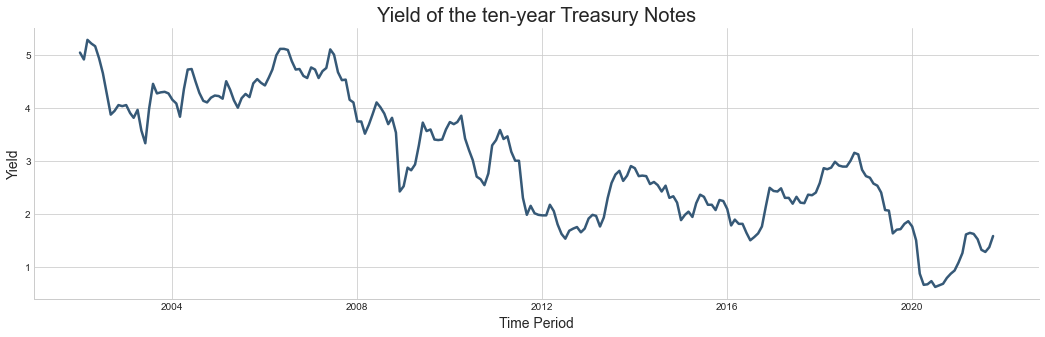

In [10]:
# Display the changes of the "Yield of the ten-year Treasury Notes" dataset over time
rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5
# Plot
plt.title('Yield of the ten-year Treasury Notes', size=20)
plt.xlabel('Time Period', size=14)
plt.ylabel('Yield', size=14)
plt.plot(forecast);

<function matplotlib.pyplot.show(close=None, block=None)>

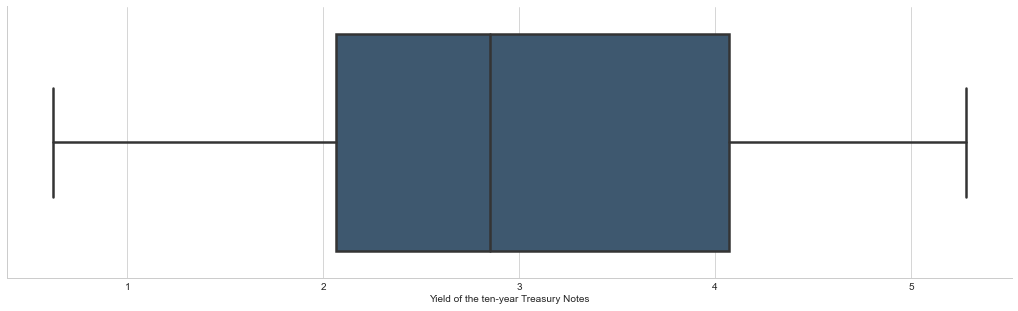

In [11]:
# Display the distribution of the "Yield on U.S. Treasury Notes" dataset in a boxplot
sns.boxplot(x = df_forecast['Yield of the ten-year Treasury Notes'])
plt.show

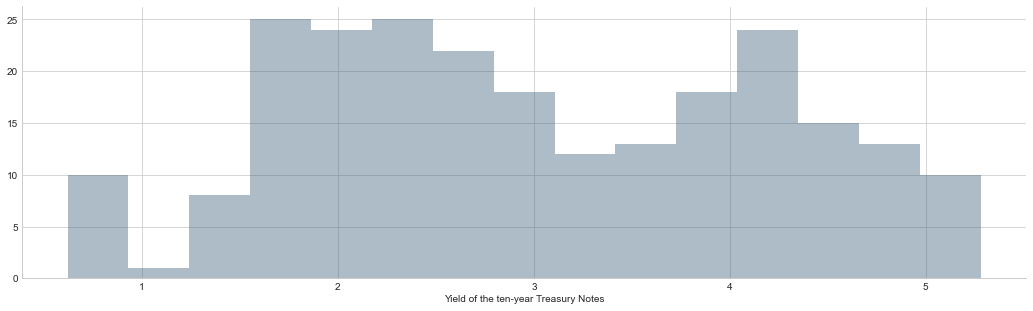

In [12]:
# Display the distribution of the "Yield on U.S. Treasury Notes" dataset in a histogram
sns.distplot(df_forecast['Yield of the ten-year Treasury Notes'], bins = 15, kde = False)
plt.show()

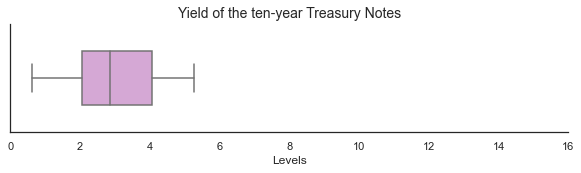

In [13]:
# Display the distribution of the "Yield on U.S. Treasury Notes" dataset in a boxplot with labels
# Set style
sns.set(style='white')

# Set figure size
fig, ax = plt.subplots(figsize=(10,2))

# Create box plot
sns.boxplot(df_forecast['Yield of the ten-year Treasury Notes'], color='plum', width=.5)

# Title and x-label
plt.title('Yield of the ten-year Treasury Notes', fontsize=14)
plt.xlabel('Levels')

# Despine
sns.despine()

# Add full range of value to the x-axis
plt.xlim([0,6])
plt.xticks(np.arange(0,18,2))

plt.show()

<AxesSubplot:ylabel='Density'>

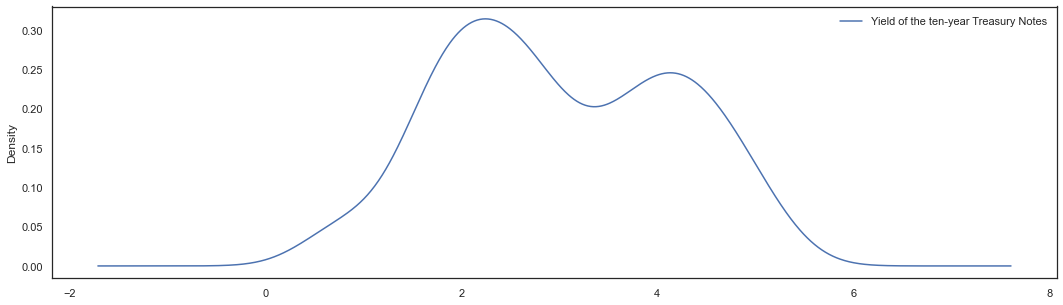

In [14]:
# Display the density distribution
df_forecast[['Yield of the ten-year Treasury Notes']].plot(kind='density')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

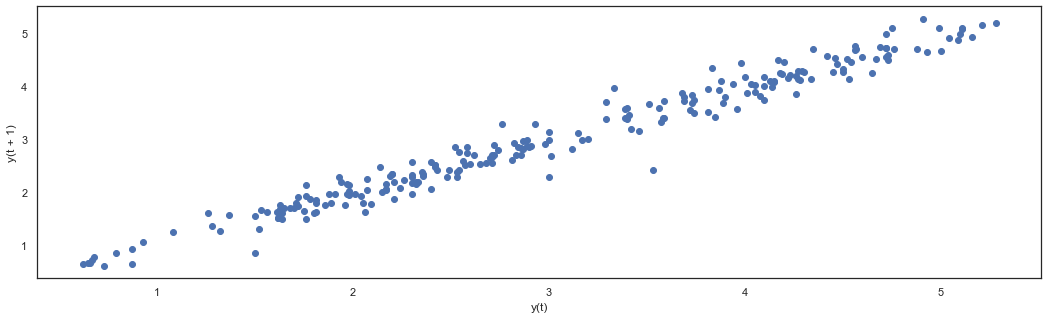

In [15]:
# Display a scatter plot with lag 1
pd.plotting.lag_plot(df_forecast['Yield of the ten-year Treasury Notes'],lag=1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 12)'>

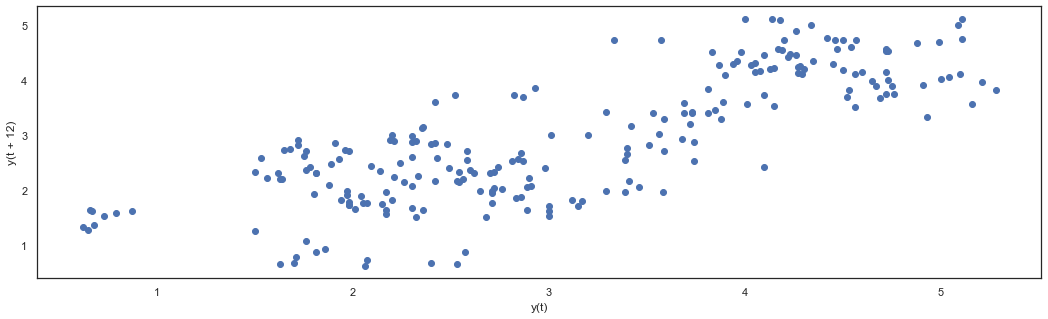

In [16]:
# Display a scatter plot with lag 12, for a year
pd.plotting.lag_plot(df_forecast['Yield of the ten-year Treasury Notes'],lag=12)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 6)'>

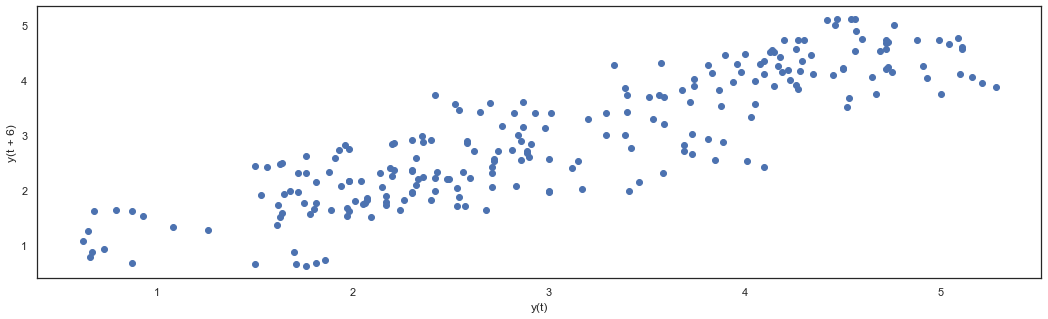

In [17]:
# Display a scatter plot with lag 6, for a half year
pd.plotting.lag_plot(df_forecast['Yield of the ten-year Treasury Notes'],lag=6)

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

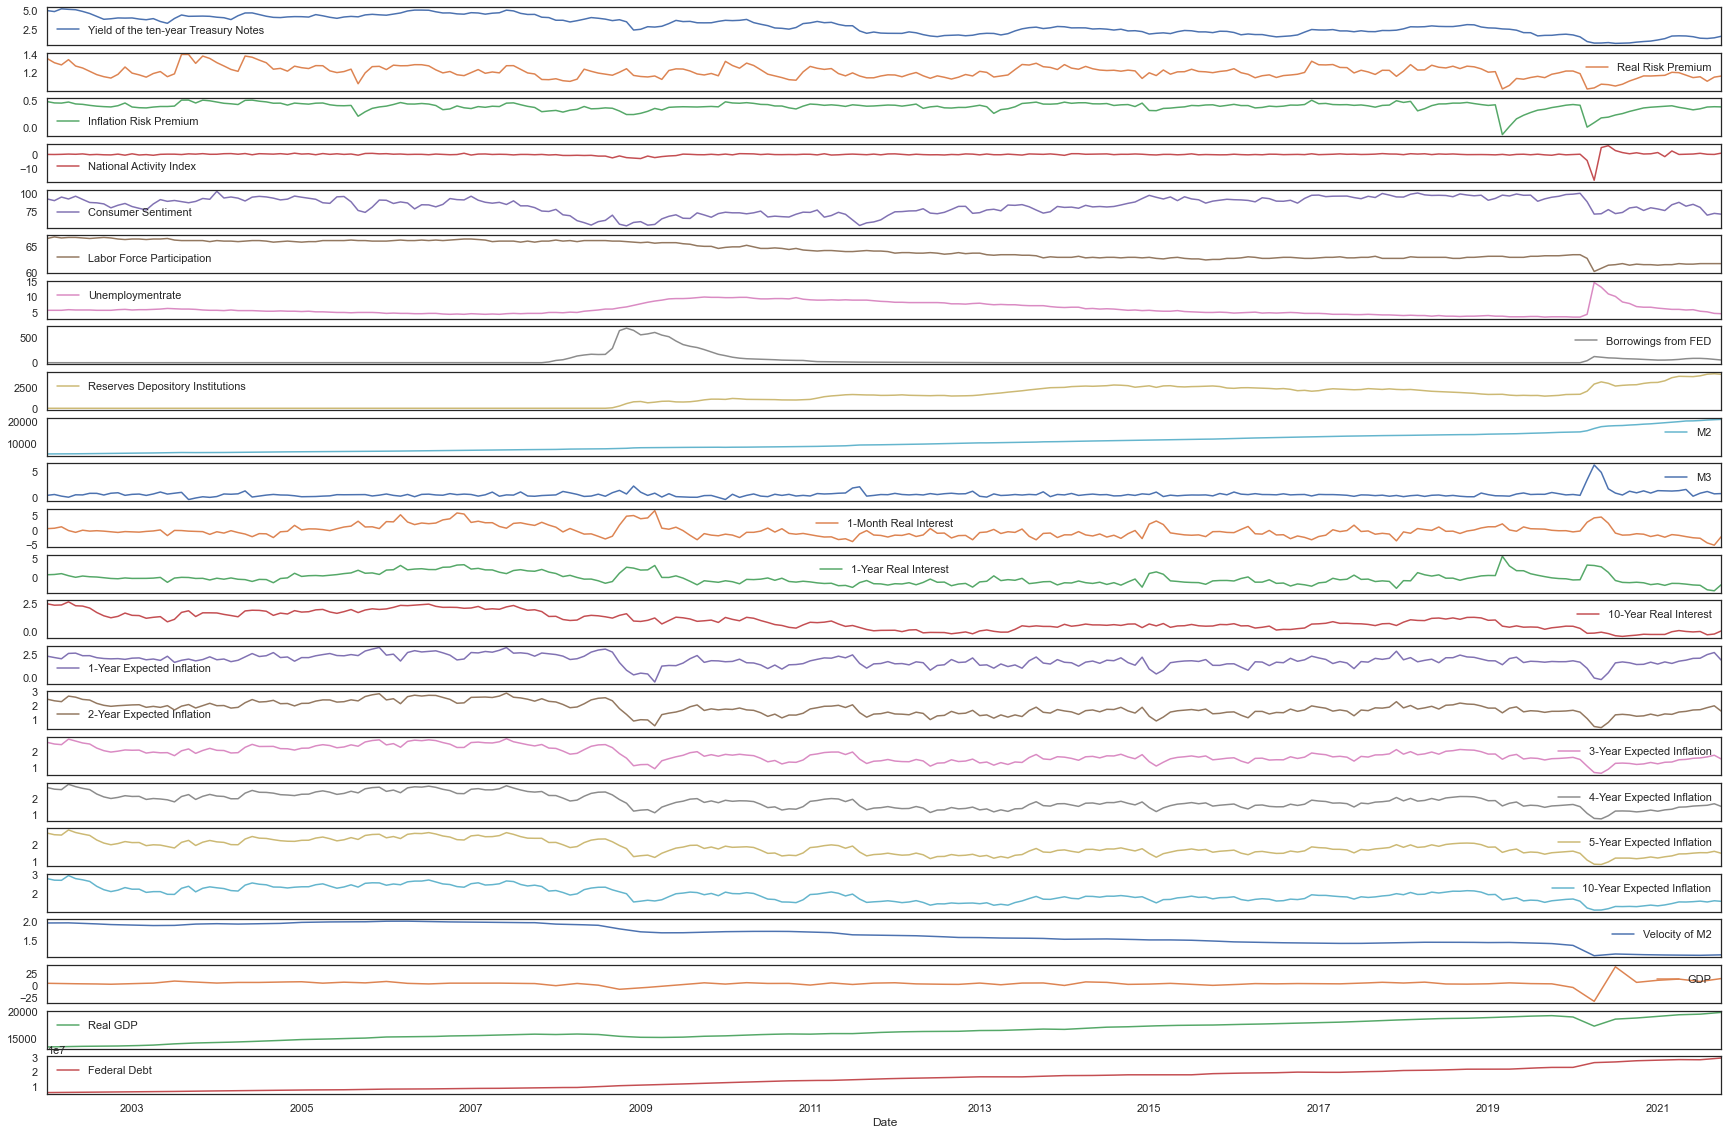

In [18]:
# Display all datasets in a plot
df_forecast.plot(subplots=True, figsize=(30,20))

### 2.1 Adding new columns

In [19]:
# Calcualte different mean
quarterly_mean = df_forecast.rolling(4).mean()
half_year_mean = df_forecast.rolling(6).mean()
annual_mean = df_forecast.rolling(12).mean()

In [20]:
# Create new columns
df_forecast["quarterly_mean"] = quarterly_mean["Yield of the ten-year Treasury Notes"] / df_forecast["Yield of the ten-year Treasury Notes"]
df_forecast["half_year_mean"] = half_year_mean["Yield of the ten-year Treasury Notes"] / df_forecast["Yield of the ten-year Treasury Notes"]
df_forecast["annual_mean"] = annual_mean["Yield of the ten-year Treasury Notes"] / df_forecast["Yield of the ten-year Treasury Notes"]

In [21]:
# Create new columns
df_forecast["annual_quarterly_mean"] = df_forecast["annual_mean"] / df_forecast["quarterly_mean"]
df_forecast["annual_half_mean"] = df_forecast["annual_mean"] / df_forecast["half_year_mean"]

In [22]:
# Dropping the first 11 rows because of NAN values
df_forecast = df_forecast.iloc[11: , :]

In [23]:
df_forecast.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 227 entries, 2002-12-01 to 2021-10-01
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Yield of the ten-year Treasury Notes  227 non-null    float64
 1   Real Risk Premium                     227 non-null    float64
 2   Inflation Risk Premium                227 non-null    float64
 3   National Activity Index               227 non-null    float64
 4   Consumer Sentiment                    227 non-null    float64
 5   Labor Force Participation             227 non-null    float64
 6   Unemploymentrate                      227 non-null    float64
 7   Borrowings from FED                   227 non-null    float64
 8   Reserves Depository Institutions      227 non-null    float64
 9   M2                                    227 non-null    float64
 10  M3                                    227 non-null    float64
 11  

## <a id='tsa'></a>
## 3. Time series analysis

### 3.1 Testing for White Noise

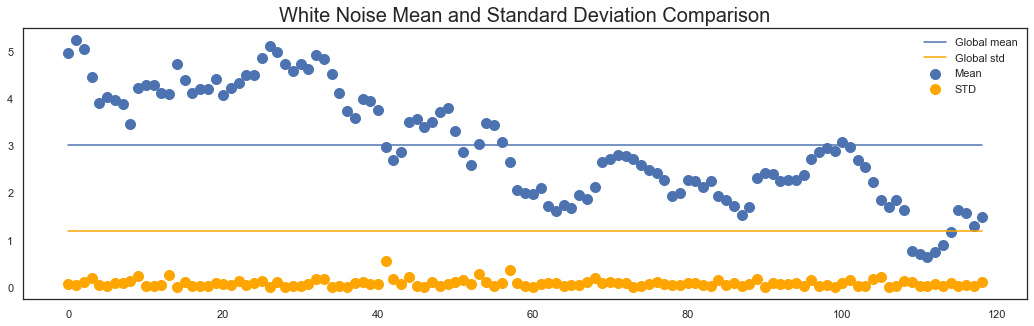

In [24]:
# Split into an arbitraty number of chunks
white_noise_chunks = np.split(forecast, 119)
means, stds = [], []

# Get the mean and std values for every chunk
for chunk in white_noise_chunks:
    means.append(np.mean(chunk))
    stds.append(np.std(chunk))
      
# Plot
plt.title('White Noise Mean and Standard Deviation Comparison', size=20)
plt.plot(np.arange(len(means)), [forecast.mean()] * len(means), label='Global mean', lw=1.5)
plt.scatter(x=np.arange(len(means)), y=means, label='Mean', s=100)
plt.plot(np.arange(len(stds)), [forecast.std()] * len(stds), label='Global std', lw=1.5, color='orange')
plt.scatter(x=np.arange(len(stds)), y=stds, label='STD', color='orange', s=100)
plt.legend();

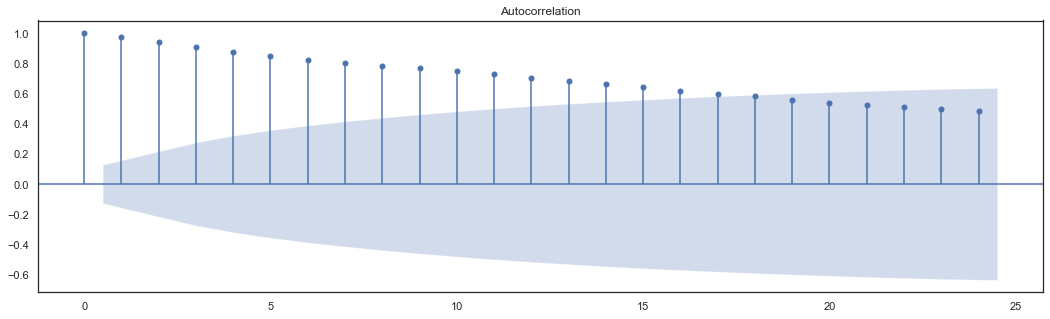

In [25]:
# Display the Autocorrelation
plot_acf(np.array(forecast));

### 3.2 Testing for Stationary

In [26]:
# Create new dataframe
white_noise = df_forecast.copy()

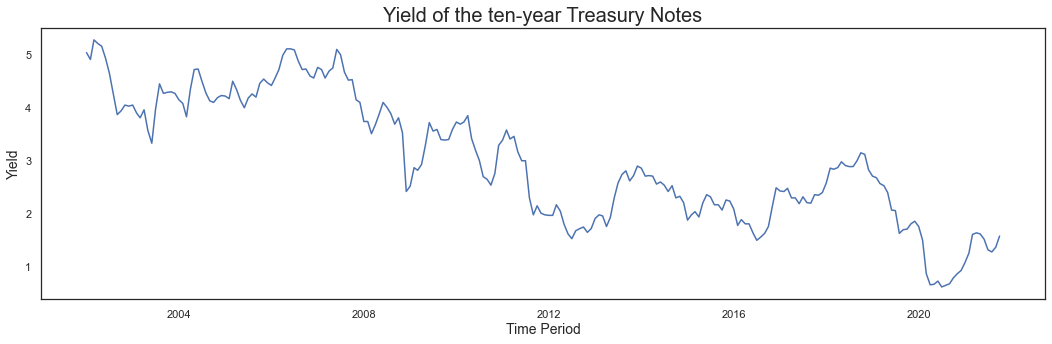

In [27]:
# Display the changes of the "Yield of the ten-year Treasury Notes" dataset over time
plt.title('Yield of the ten-year Treasury Notes', size=20)
plt.xlabel('Time Period', size=14)
plt.ylabel('Yield', size=14)
plt.plot(forecast);

In [28]:
# Make Stationary test with adfuller function
result = adfuller(white_noise['Yield of the ten-year Treasury Notes'])

In [29]:
# Print results
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critial Values: {result[4]}')

if result[1] > 0.05 :
  print('Series is not Stationary')
else:
  print('Series is Stationary')

Test Statistics: -1.697066541226024
p-value: 0.4326245133664073
Critial Values: {'1%': -3.4597521044060353, '5%': -2.874472927517147, '10%': -2.5736628197530864}
Series is not Stationary


### 3.3 Decomposing the Time Series 

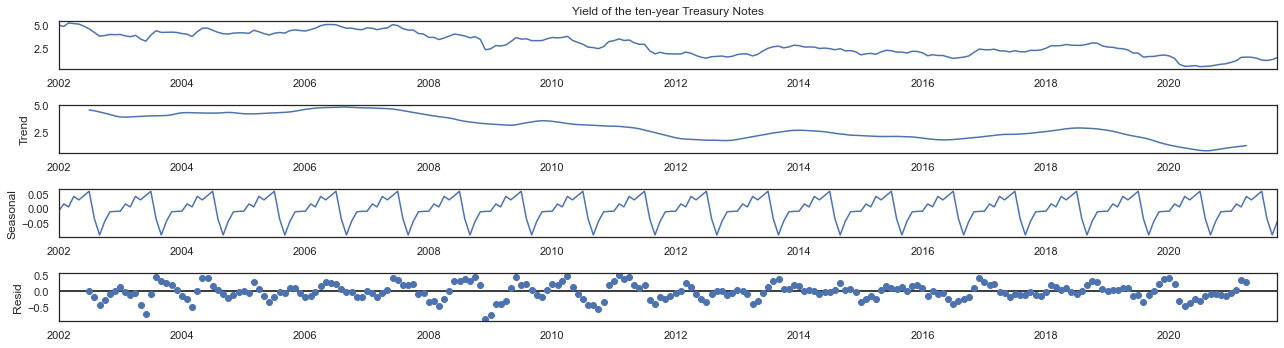

In [30]:
# Decompose and plot with additive method
decomposed = seasonal_decompose(forecast, model='additive')
decomposed.plot();

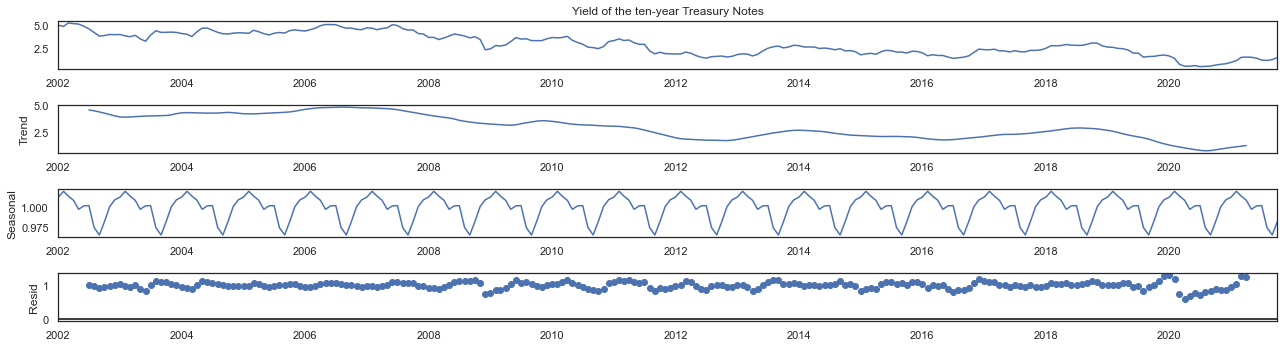

In [31]:
# Decompose and plot with multiplicative
decomposed = seasonal_decompose(forecast, model='multiplicative')
decomposed.plot();

### 3.4 Create Train & Test set

In [32]:
# Train data from 2002-12 until 2017-12
df_train = df_forecast['2002-12-01':'2017-12-01']

df_train.count()

Yield of the ten-year Treasury Notes    181
Real Risk Premium                       181
Inflation Risk Premium                  181
National Activity Index                 181
Consumer Sentiment                      181
Labor Force Participation               181
Unemploymentrate                        181
Borrowings from FED                     181
Reserves Depository Institutions        181
M2                                      181
M3                                      181
1-Month Real Interest                   181
1-Year Real Interest                    181
10-Year Real Interest                   181
1-Year Expected Inflation               181
2-Year Expected Inflation               181
3-Year Expected Inflation               181
4-Year Expected Inflation               181
5-Year Expected Inflation               181
10-Year Expected Inflation              181
Velocity of M2                          181
GDP                                     181
Real GDP                        

In [33]:
# Test data from 2018-01 until 2021-10
df_test = df_forecast['2018-01-01':'2021-10-01']

df_test.count()

Yield of the ten-year Treasury Notes    46
Real Risk Premium                       46
Inflation Risk Premium                  46
National Activity Index                 46
Consumer Sentiment                      46
Labor Force Participation               46
Unemploymentrate                        46
Borrowings from FED                     46
Reserves Depository Institutions        46
M2                                      46
M3                                      46
1-Month Real Interest                   46
1-Year Real Interest                    46
10-Year Real Interest                   46
1-Year Expected Inflation               46
2-Year Expected Inflation               46
3-Year Expected Inflation               46
4-Year Expected Inflation               46
5-Year Expected Inflation               46
10-Year Expected Inflation              46
Velocity of M2                          46
GDP                                     46
Real GDP                                46
Federal Deb

### 3.5 Moving-average

In [34]:
# Create new dataframe
moving_averages = df_forecast.copy()

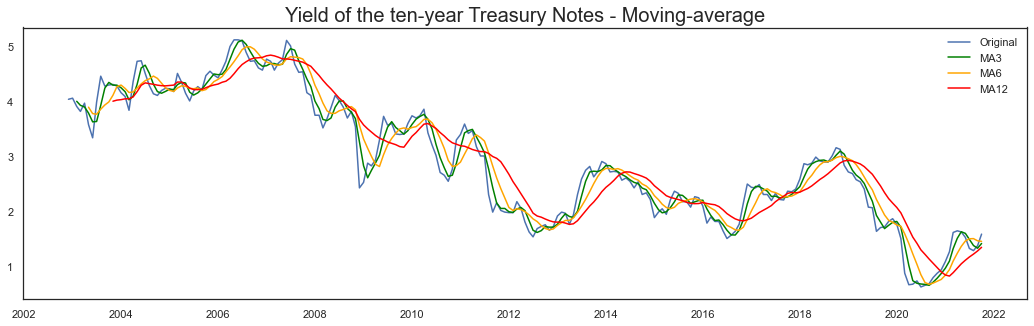

In [35]:
# Calculcate Moving-averages
moving_averages['MA3'] = moving_averages['Yield of the ten-year Treasury Notes'].rolling(window=3).mean()
moving_averages['MA6'] = moving_averages['Yield of the ten-year Treasury Notes'].rolling(window=6).mean()
moving_averages['MA12'] = moving_averages['Yield of the ten-year Treasury Notes'].rolling(window=12).mean()

# Plot
plt.title('Yield of the ten-year Treasury Notes - Moving-average', size=20)
plt.plot(moving_averages['Yield of the ten-year Treasury Notes'], label='Original')
plt.plot(moving_averages['MA3'], color='green', label='MA3')
plt.plot(moving_averages['MA6'], color='orange', label='MA6')
plt.plot(moving_averages['MA12'], color='red', label='MA12')
plt.legend();

#### 3.5.1 Moving-average forecast

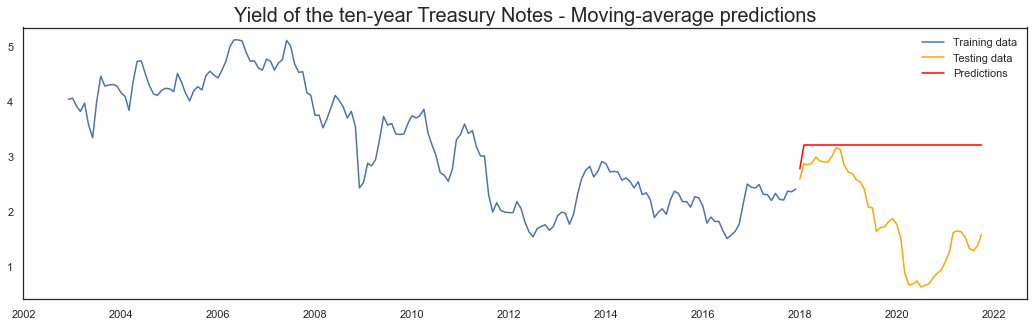

In [36]:
# Train the model
model = ARMA(df_train['Yield of the ten-year Treasury Notes'], order=(0, 1))
results = model.fit()
predictions = results.forecast(steps=46)

predictions_df = pd.DataFrame(index=df_test.index, data=predictions[0])

# Plot
plt.title('Yield of the ten-year Treasury Notes - Moving-average predictions', size=20)
plt.plot(df_train['Yield of the ten-year Treasury Notes'], label='Training data')
plt.plot(df_test['Yield of the ten-year Treasury Notes'], color='orange', label='Testing data')
plt.plot(predictions_df, color='red', label='Predictions')
plt.legend();

### 3.6 Exponentially Weighted Moving Average

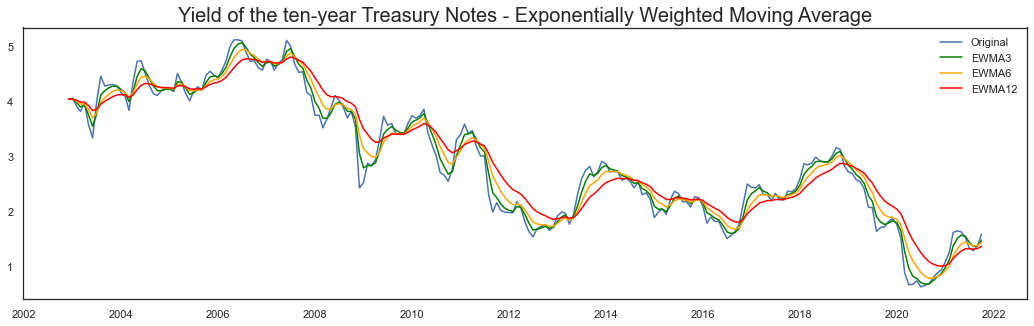

In [37]:
# Calculate Exponentially Weighted Moving Average
moving_averages['EWMA3'] = moving_averages['Yield of the ten-year Treasury Notes'].ewm(span=3, adjust=False).mean()
moving_averages['EWMA6'] = moving_averages['Yield of the ten-year Treasury Notes'].ewm(span=6, adjust=False).mean()
moving_averages['EWMA12'] = moving_averages['Yield of the ten-year Treasury Notes'].ewm(span=12, adjust=False).mean()

# Plot
plt.title('Yield of the ten-year Treasury Notes - Exponentially Weighted Moving Average', size=20)
plt.plot(moving_averages['Yield of the ten-year Treasury Notes'], label='Original')
plt.plot(moving_averages['EWMA3'], color='green', label='EWMA3')
plt.plot(moving_averages['EWMA6'], color='orange', label='EWMA6')
plt.plot(moving_averages['EWMA12'], color='red', label='EWMA12')
plt.legend();

#### 3.6.1 Exponentially Exponentially Weighted Moving Average forecast

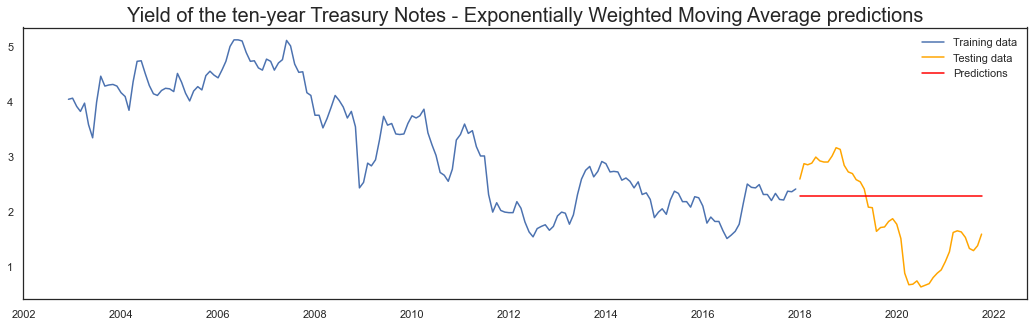

In [38]:
# Create forecasting model Exponentially Weighted Moving Average
# Model parameters
span = 12 
alpha = 2 / (span + 1)

# Train the model
model = SimpleExpSmoothing(df_train['Yield of the ten-year Treasury Notes'])
results = model.fit(smoothing_level=alpha, optimized=False)
predictions = results.forecast(steps=46)

# Plot
plt.title('Yield of the ten-year Treasury Notes - Exponentially Weighted Moving Average predictions', size=20)
plt.plot(df_train['Yield of the ten-year Treasury Notes'], label='Training data')
plt.plot(df_test['Yield of the ten-year Treasury Notes'], color='orange', label='Testing data')
plt.plot(predictions, color='red', label='Predictions')
plt.legend();

### 3.7 Exponential Smoothing

In [39]:
# Change index to monthly
df_forecast.index.freq = 'MS'

#### 3.7.1 Double Exponential Smoothing

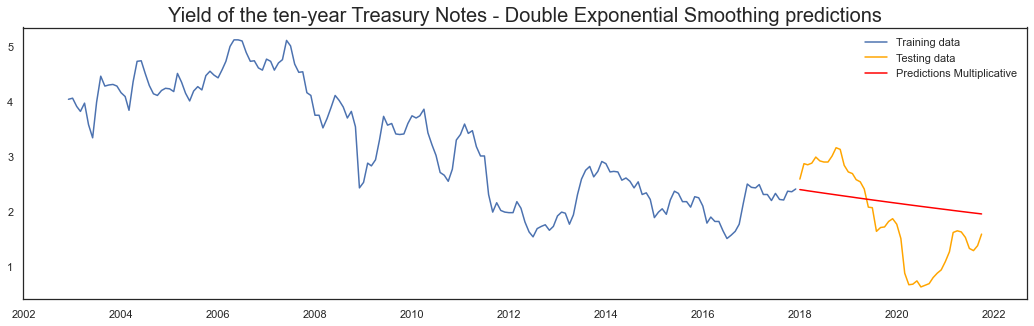

In [40]:
# Create multiplicative model
model_mul = ExponentialSmoothing(df_train['Yield of the ten-year Treasury Notes'], trend='mul')
results_mul = model_mul.fit()
predictions_mul = results_mul.forecast(steps=46)

# Plot
plt.title('Yield of the ten-year Treasury Notes - Double Exponential Smoothing predictions', size=20)
plt.plot(df_train['Yield of the ten-year Treasury Notes'], label='Training data')
plt.plot(df_test['Yield of the ten-year Treasury Notes'], color='orange', label='Testing data')
plt.plot(predictions_mul, color='red', label='Predictions Multiplicative')
plt.legend();

#### 3.7.2 Triple Exponential Smoothing

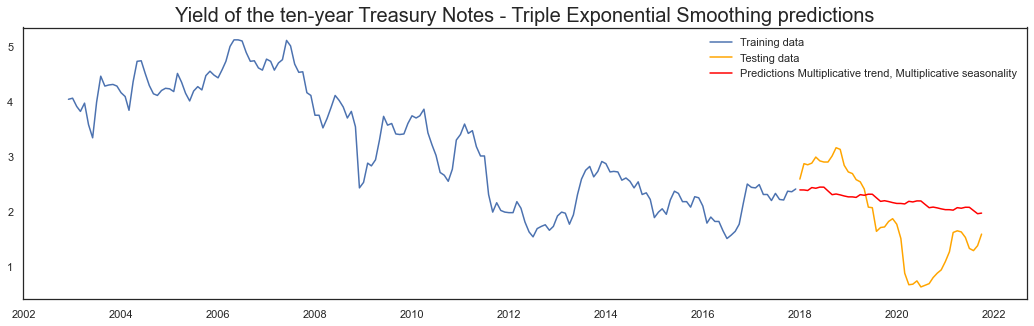

In [41]:
# Multiplicative trend / Multiplicative seasonality model
model_mul_mul = ExponentialSmoothing(df_train['Yield of the ten-year Treasury Notes'], trend='mul', seasonal='mul', initialization_method='estimated')
results_mul_mul = model_mul_mul.fit()
predictions_mul_mul = results_mul_mul.forecast(steps=46)

# Plot
plt.title('Yield of the ten-year Treasury Notes - Triple Exponential Smoothing predictions', size=20)
plt.plot(df_train['Yield of the ten-year Treasury Notes'], label='Training data')
plt.plot(df_test['Yield of the ten-year Treasury Notes'], color='orange', label='Testing data')
plt.plot(predictions_mul_mul, color='red', label='Predictions Multiplicative trend, Multiplicative seasonality')
plt.legend();

## <a id='fs'></a>
## 4. Feature Selection

### 4.1 Correlation analysis

In [42]:
# Return the correlation between the datasets
corr = df_forecast.corr()
corr

,Yield of the ten-year Treasury Notes,Real Risk Premium,Inflation Risk Premium,National Activity Index,Consumer Sentiment,Labor Force Participation,Unemploymentrate,Borrowings from FED,Reserves Depository Institutions,M2,...,10-Year Expected Inflation,Velocity of M2,GDP,Real GDP,Federal Debt,quarterly_mean,half_year_mean,annual_mean,annual_quarterly_mean,annual_half_mean
Yield of the ten-year Treasury Notes,1.00,0.53,0.31,0.03,0.04,0.89,-0.19,0.01,-0.86,-0.82,...,0.94,0.91,0.00,-0.75,-0.87,-0.21,-0.28,-0.39,-0.37,-0.34
Real Risk Premium,0.53,1.00,0.76,0.16,0.31,0.30,-0.20,-0.15,-0.26,-0.37,...,0.57,0.37,0.09,-0.31,-0.37,-0.44,-0.54,-0.62,-0.54,-0.45
Inflation Risk Premium,0.31,0.76,1.00,0.26,0.18,0.17,-0.09,-0.26,-0.11,-0.27,...,0.37,0.25,0.22,-0.23,-0.26,-0.46,-0.52,-0.55,-0.42,-0.33
National Activity Index,0.03,0.16,0.26,1.00,0.17,-0.02,-0.15,-0.26,0.05,0.05,...,0.08,-0.00,0.65,0.07,0.03,-0.48,-0.39,-0.26,0.03,0.01
Consumer Sentiment,0.04,0.31,0.18,0.17,1.00,-0.17,-0.71,-0.59,0.09,0.17,...,0.22,-0.10,0.13,0.29,0.15,-0.13,-0.18,-0.21,-0.21,-0.17
Labor Force Participation,0.89,0.30,0.17,-0.02,-0.17,1.00,-0.03,0.20,-0.96,-0.91,...,0.77,0.96,-0.07,-0.88,-0.96,-0.07,-0.11,-0.16,-0.13,-0.11
Unemploymentrate,-0.19,-0.20,-0.09,-0.15,-0.71,-0.03,1.00,0.38,0.07,-0.11,...,-0.40,-0.05,-0.09,-0.29,-0.04,0.18,0.26,0.33,0.30,0.24
Borrowings from FED,0.01,-0.15,-0.26,-0.26,-0.59,0.20,0.38,1.00,-0.12,-0.09,...,-0.11,0.04,-0.29,-0.17,-0.11,0.08,0.10,0.12,0.12,0.10
Reserves Depository Institutions,-0.86,-0.26,-0.11,0.05,0.09,-0.96,0.07,-0.12,1.00,0.88,...,-0.75,-0.94,0.11,0.83,0.92,0.02,0.05,0.05,0.03,0.00
M2,-0.82,-0.37,-0.27,0.05,0.17,-0.91,-0.11,-0.09,0.88,1.00,...,-0.68,-0.96,0.14,0.94,0.98,0.05,0.08,0.15,0.14,0.12


### 4.2 Filter Method

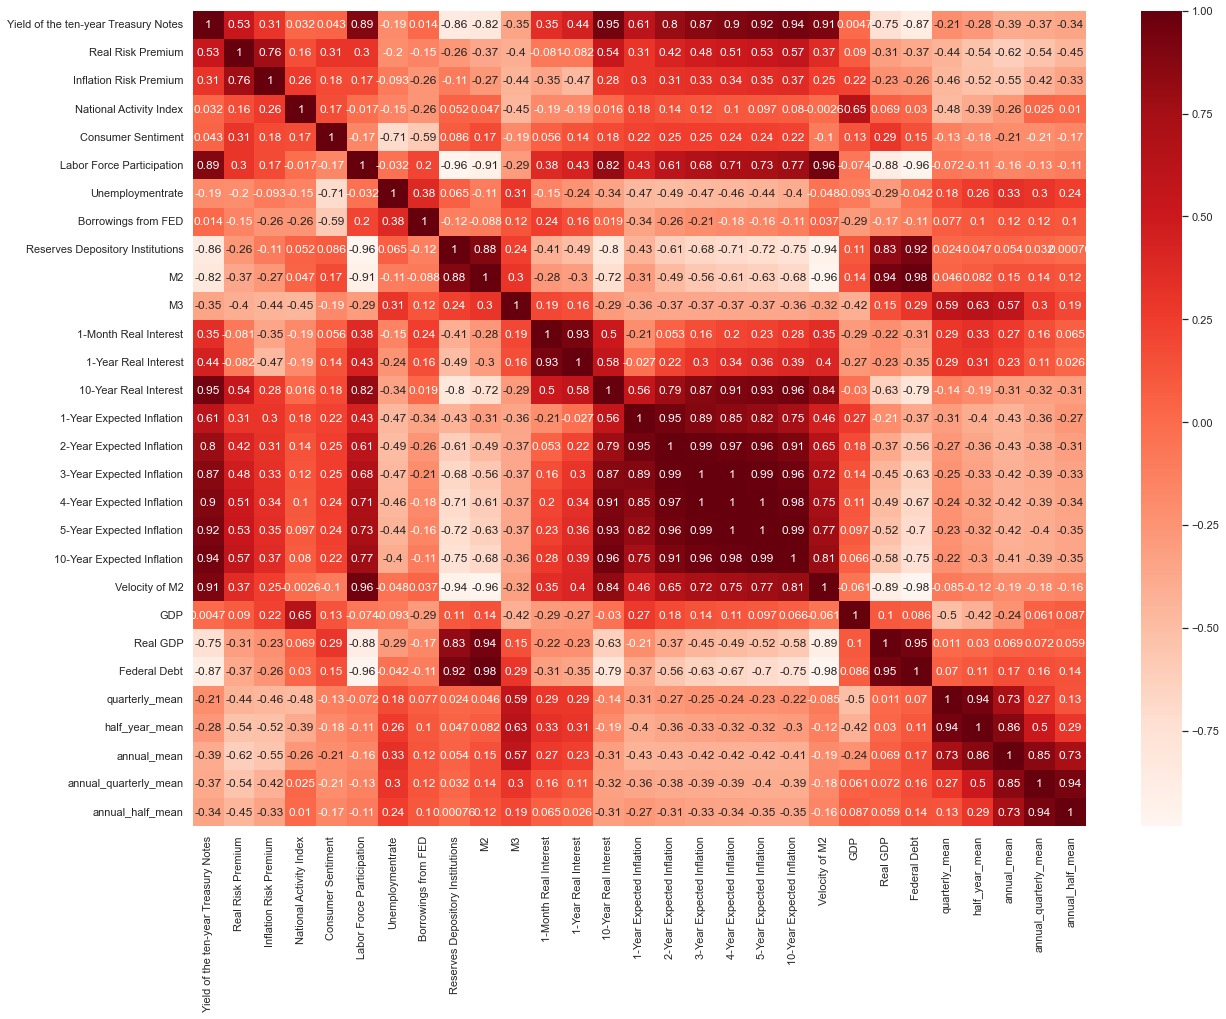

In [43]:
# Visualize the correlations in a heatmap
# Using Pearson correlation
plt.figure (figsize=(20,15))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

<AxesSubplot:>

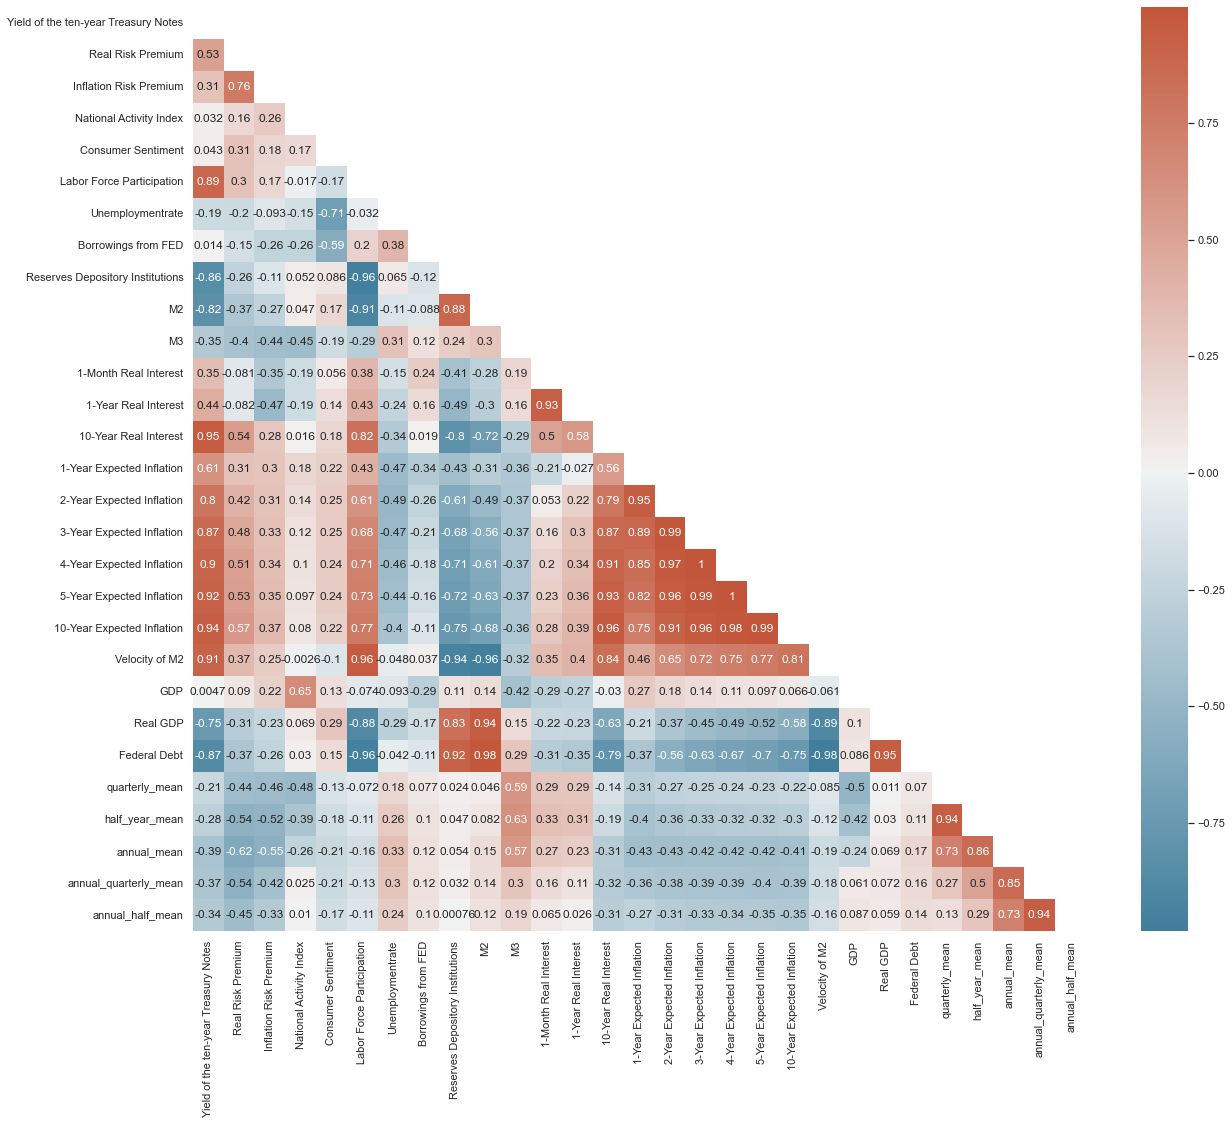

In [44]:
# Visualize the correlations in a diagonal heatmap
f, ax = plt.subplots(figsize=(20, 17))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [45]:
# Display the correlation to target variable
corr['Yield of the ten-year Treasury Notes'].sort_values(ascending=False)

Yield of the ten-year Treasury Notes    1.00
10-Year Real Interest                   0.95
10-Year Expected Inflation              0.94
5-Year Expected Inflation               0.92
Velocity of M2                          0.91
4-Year Expected Inflation               0.90
Labor Force Participation               0.89
3-Year Expected Inflation               0.87
2-Year Expected Inflation               0.80
1-Year Expected Inflation               0.61
Real Risk Premium                       0.53
1-Year Real Interest                    0.44
1-Month Real Interest                   0.35
Inflation Risk Premium                  0.31
Consumer Sentiment                      0.04
National Activity Index                 0.03
Borrowings from FED                     0.01
GDP                                     0.00
Unemploymentrate                       -0.19
quarterly_mean                         -0.21
half_year_mean                         -0.28
annual_half_mean                       -0.34
M3        

In [46]:
# Datasets with correlation higher than 0.5 to target variable
cor_target = abs(corr['Yield of the ten-year Treasury Notes'])
# Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Yield of the ten-year Treasury Notes   1.00
Real Risk Premium                      0.53
Labor Force Participation              0.89
Reserves Depository Institutions       0.86
M2                                     0.82
10-Year Real Interest                  0.95
1-Year Expected Inflation              0.61
2-Year Expected Inflation              0.80
3-Year Expected Inflation              0.87
4-Year Expected Inflation              0.90
5-Year Expected Inflation              0.92
10-Year Expected Inflation             0.94
Velocity of M2                         0.91
Real GDP                               0.75
Federal Debt                           0.87
Name: Yield of the ten-year Treasury Notes, dtype: float64

## <a id='regression_fm'></a>
## 5. Creating regression models with features from Filter Method

### Definition of variables, train-test splitting

In [47]:
y = df_forecast['Yield of the ten-year Treasury Notes']
X = df_forecast[['Real Risk Premium',
                 'Labor Force Participation',
                 'Reserves Depository Institutions',  
                 'M2',
                 '10-Year Real Interest',
                 '1-Year Expected Inflation', 
                 '2-Year Expected Inflation', 
                 '3-Year Expected Inflation', 
                 '4-Year Expected Inflation',
                 '5-Year Expected Inflation',
                 '10-Year Expected Inflation',
                 'Velocity of M2',
                 'Federal Debt',
                 'Real GDP']]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)

In [49]:
print('Number of training data:', len(X_train))
print('Number of test data:', len(X_test))

Number of training data: 181
Number of test data: 46


### 5.1 Linear Regression

In [50]:
# Create Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [51]:
print ("Training Set Score R^2: {:.2f}".format(lr.score(X_train, y_train)))
print ("Test Set Score R^2: {:.2f}".format(lr.score(X_test, y_test)))

Training Set Score R^2: 0.97
Test Set Score R^2: -0.80


#### 5.1.1 Feature importance

<AxesSubplot:ylabel='features'>

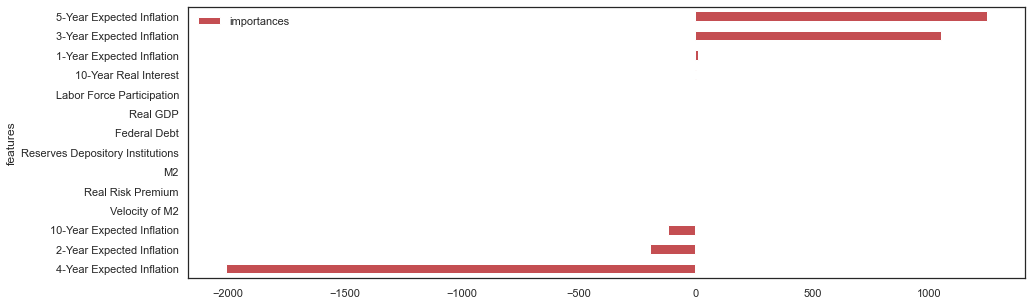

In [52]:
cols = X_train.columns

# Derive feature importance from Linear Regression
importances = lr.coef_
indices     = np.argsort(importances)[::-1]

# Barplot with feature importance
df = pd.DataFrame({'features':cols,'importances': importances})
df.sort_values('importances', inplace=True)
df.plot(kind='barh', y='importances', x='features', color='r', figsize=(15,5))

### 5.2 Ridge

#### 5.2.1 Rigde alpha 0.1

In [53]:
# Create Ridge model
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)

Ridge(alpha=0.01)

In [54]:
print ("Training Set Score R^2: {:.2f}".format(rr.score(X_train, y_train)))
print ("Test Set Score R^2: {:.2f}".format(rr.score(X_test, y_test)))

Training Set Score R^2: 0.97
Test Set Score R^2: 0.08


#### 5.2.2 Rigde alpha 1

In [55]:
# Create Ridge model
rr1 = Ridge(alpha=1)
rr1.fit(X_train, y_train)

Ridge(alpha=1)

In [56]:
print ("Training Set Score R^2: {:.2f}".format(rr1.score(X_train, y_train)))
print ("Test Set Score R^2: {:.2f}".format(rr1.score(X_test, y_test)))

Training Set Score R^2: 0.96
Test Set Score R^2: 0.53


#### 5.2.3 Rigde alpha 10

In [57]:
# Create Ridge model
rr10 = Ridge(alpha=10)
rr10.fit(X_train, y_train)

Ridge(alpha=10)

In [58]:
print ("Training Set Score R^2: {:.2f}".format(rr10.score(X_train, y_train)))
print ("Test Set Score R^2: {:.2f}".format(rr10.score(X_test, y_test)))

Training Set Score R^2: 0.96
Test Set Score R^2: 0.22


#### 5.2.4 Feature importance

In [59]:
cols = X_train.columns

<AxesSubplot:ylabel='features'>

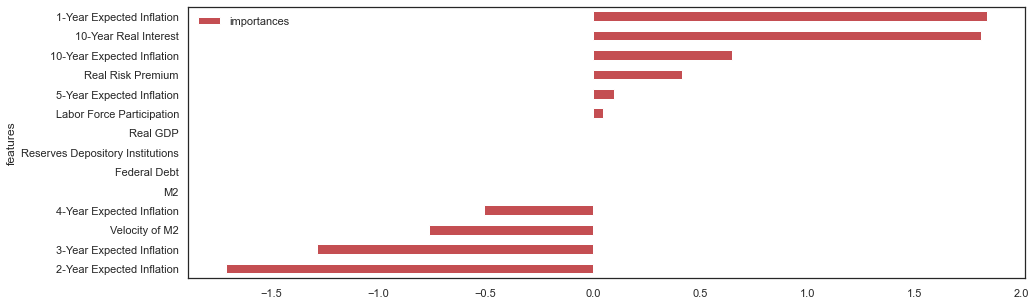

In [60]:
# Derive feature importance from Ridge with alpha 0.1
importances = rr.coef_
indices     = np.argsort(importances)[::-1]

# Barplot with feature importance
df = pd.DataFrame({'features':cols,'importances': importances})
df.sort_values('importances', inplace=True)
df.plot(kind='barh', y='importances', x='features', color='r', figsize=(15,5))

<AxesSubplot:ylabel='features'>

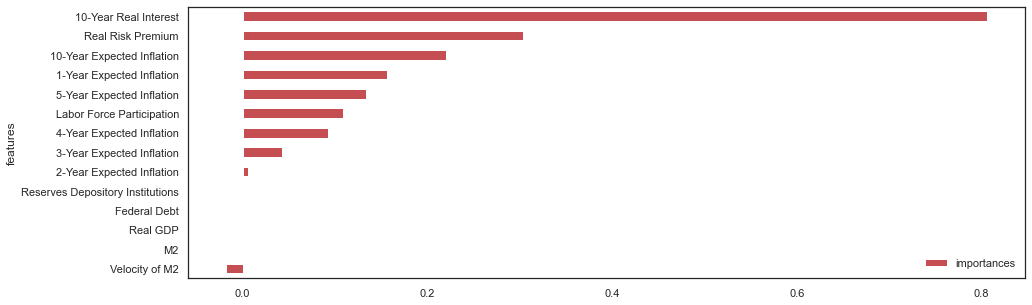

In [61]:
# Derive feature importance from Ridge with alpha 1
importances = rr1.coef_
indices     = np.argsort(importances)[::-1]

# Barplot with feature importance
df = pd.DataFrame({'features':cols,'importances': importances})
df.sort_values('importances', inplace=True)
df.plot(kind='barh', y='importances', x='features', color='r', figsize=(15,5))

<AxesSubplot:ylabel='features'>

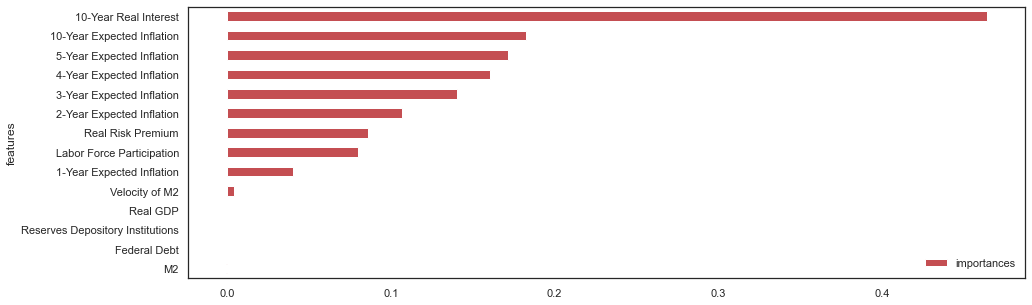

In [62]:
# Derive feature importance from Ridge with alpha 10
importances = rr10.coef_
indices     = np.argsort(importances)[::-1]

# Barplot with feature importance
df = pd.DataFrame({'features':cols,'importances': importances})
df.sort_values('importances', inplace=True)
df.plot(kind='barh', y='importances', x='features', color='r', figsize=(15,5))

### 5.3 LASSO

In [63]:
# Create LASSO model
lasso = make_pipeline(StandardScaler(), LassoCV())
lasso.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('lassocv', LassoCV())])

In [64]:
print ("Training Set Score R^2: {:.2f}".format(lasso.score(X_train, y_train)))
print ("Test Set Score R^2: {:.2f}".format(lasso.score(X_test, y_test)))

Training Set Score R^2: 0.96
Test Set Score R^2: 0.64


#### 5.3.1 Feature importance

In [65]:
lasso_cv_coef = lasso[-1].coef_

<AxesSubplot:ylabel='features'>

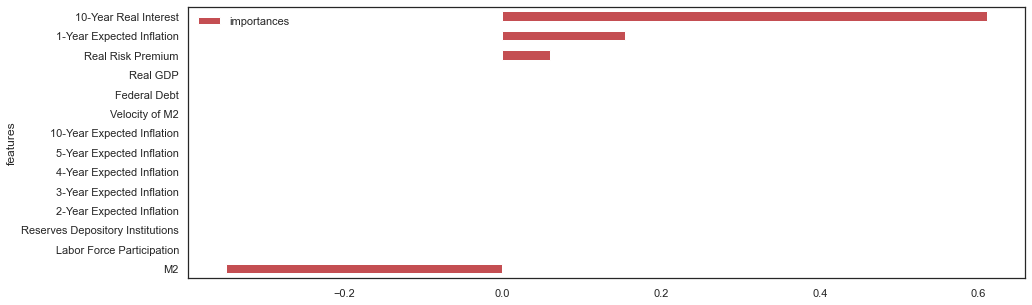

In [66]:
# Derive feature importance from LASSO
importances = lasso_cv_coef
indices     = np.argsort(importances)[::-1]

# Barplot with feature importance
df = pd.DataFrame({'features':cols,'importances': importances})
df.sort_values('importances', inplace=True)
df.plot(kind='barh', y='importances', x='features', color='r', figsize=(15,5))

### 5.4 Elastic Net

In [67]:
# Create Elastic Net model
encv = make_pipeline(StandardScaler(), ElasticNetCV())
encv.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('elasticnetcv', ElasticNetCV())])

In [68]:
print ("Training Set Score R^2: {:.2f}".format(encv.score(X_train, y_train)))
print ("Test Set Score R^2: {:.2f}".format(encv.score(X_test, y_test)))

Training Set Score R^2: 0.96
Test Set Score R^2: 0.65


#### 5.4.1 Feature importance

In [69]:
encv_cv_coef = encv[-1].coef_

<AxesSubplot:ylabel='features'>

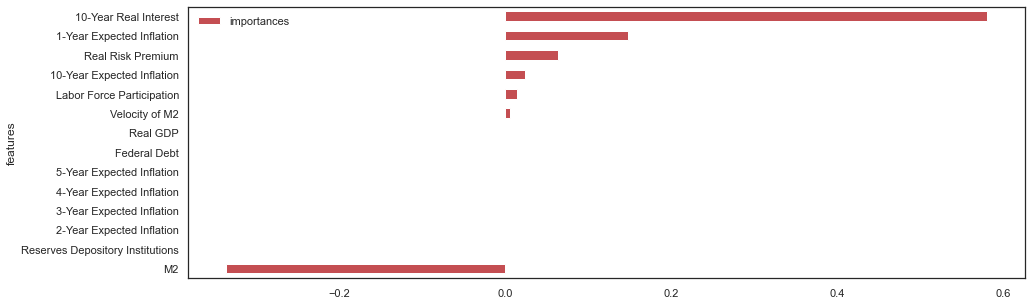

In [70]:
# Derive feature importance from Elastic Net
importances = encv_cv_coef
indices     = np.argsort(importances)[::-1]

# Barplot with feature importance
df = pd.DataFrame({'features':cols,'importances': importances})
df.sort_values('importances', inplace=True)
df.plot(kind='barh', y='importances', x='features', color='r', figsize=(15,5))

### 5.5 Decision Tree

#### 5.5.1 Decision Tree max_depth 3

In [71]:
# Create Decision Tree model
reg_tree = DecisionTreeRegressor(max_depth=3)

# Train Decision Tree Classifer
reg_tree = reg_tree.fit(X_train, y_train)

In [72]:
print ("Training Set Score R^2: {:.2f}".format(reg_tree.score(X_train, y_train)))
print ("Test Set Score R^2: {:.2f}".format(reg_tree.score(X_test, y_test)))

Training Set Score R^2: 0.96
Test Set Score R^2: 0.04


#### 5.5.2 Decision Tree max_depth 5

In [73]:
# Create Decision Tree model
reg_tree5 = DecisionTreeRegressor(max_depth=5)

# Train Decision Tree Classifer
reg_tree5 = reg_tree5.fit(X_train, y_train)

In [74]:
print ("Training Set Score R^2: {:.2f}".format(reg_tree5.score(X_train, y_train)))
print ("Test Set Score R^2: {:.2f}".format(reg_tree5.score(X_test, y_test)))

Training Set Score R^2: 0.99
Test Set Score R^2: 0.39


#### 5.5.3 Decision Tree max_depth 10

In [75]:
# Create Decision Tree model
reg_tree10 = DecisionTreeRegressor(max_depth=10)

# Train Decision Tree Classifer
reg_tree10 = reg_tree10.fit(X_train, y_train)

In [76]:
print ("Training Set Score R^2: {:.2f}".format(reg_tree10.score(X_train, y_train)))
print ("Test Set Score R^2: {:.2f}".format(reg_tree10.score(X_test, y_test)))

Training Set Score R^2: 1.00
Test Set Score R^2: 0.41


#### 5.5.4 Feature importance

In [77]:
cols = X_train.columns

<AxesSubplot:ylabel='features'>

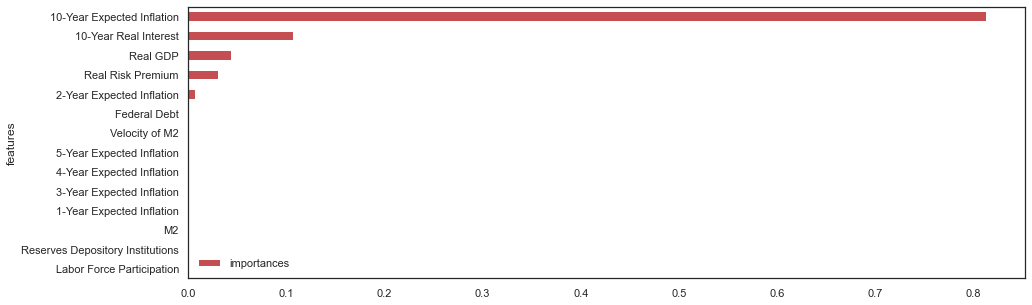

In [78]:
# Derive feature importance from Decision Tree with max_depth 3
importances = reg_tree.feature_importances_
indices     = np.argsort(importances)[::-1]

# Barplot with feature importance
df = pd.DataFrame({'features':cols,'importances': importances})
df.sort_values('importances', inplace=True)
df.plot(kind='barh', y='importances', x='features', color='r', figsize=(15,5))

<AxesSubplot:ylabel='features'>

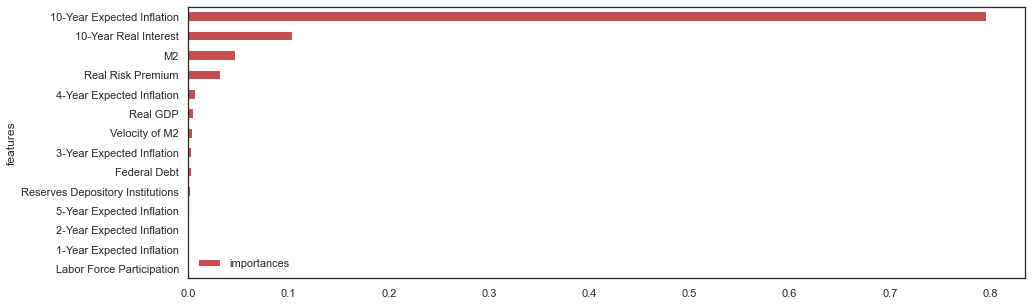

In [79]:
# Derive feature importance from Decision Tree with max_depth 5
importances = reg_tree5.feature_importances_
indices     = np.argsort(importances)[::-1]

# Barplot with feature importance
df = pd.DataFrame({'features':cols,'importances': importances})
df.sort_values('importances', inplace=True)
df.plot(kind='barh', y='importances', x='features', color='r', figsize=(15,5))

<AxesSubplot:ylabel='features'>

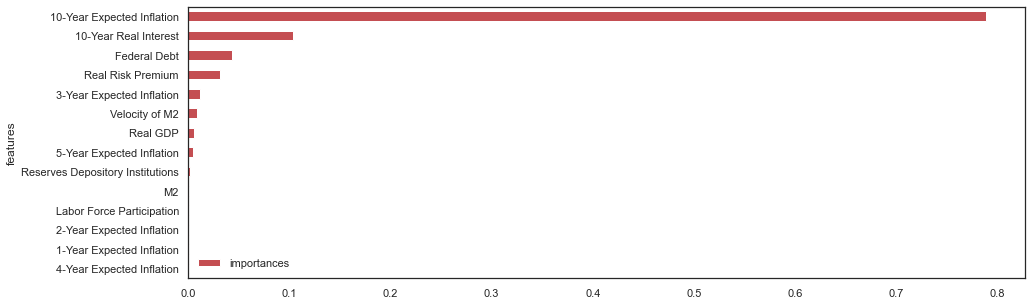

In [80]:
# Derive feature importance from Decision Tree with max_depth 10
importances = reg_tree10.feature_importances_
indices     = np.argsort(importances)[::-1]

# Barplot with feature importance
df = pd.DataFrame({'features':cols,'importances': importances})
df.sort_values('importances', inplace=True)
df.plot(kind='barh', y='importances', x='features', color='r', figsize=(15,5))

### 5.6 Random Forest

#### 5.6.1 Random Forest with 100 trees

In [81]:
# Create Random Forest model
rf100 = RandomForestRegressor(n_estimators=100)
rf100.fit(X_train,y_train)

RandomForestRegressor()

In [82]:
print ("Training Set Score R^2: {:.2f}".format(rf100.score(X_train, y_train)))
print ("Test Set Score R^2: {:.2f}".format(rf100.score(X_test, y_test)))

Training Set Score R^2: 1.00
Test Set Score R^2: 0.52


#### 5.6.2 Random Forest with 500 trees

In [83]:
# Create Random Forest model
rf500 = RandomForestRegressor(n_estimators=500)
rf500.fit(X_train,y_train)

RandomForestRegressor(n_estimators=500)

In [84]:
print ("Training Set Score R^2: {:.2f}".format(rf500.score(X_train, y_train)))
print ("Test Set Score R^2: {:.2f}".format(rf500.score(X_test, y_test)))

Training Set Score R^2: 1.00
Test Set Score R^2: 0.50


#### 5.6.3 Random Forest with 1000 trees

In [85]:
# Create Random Forest model
rf1000 = RandomForestRegressor(n_estimators=1000)
rf1000.fit(X_train,y_train)

RandomForestRegressor(n_estimators=1000)

In [86]:
print ("Training Set Score R^2: {:.2f}".format(rf1000.score(X_train, y_train)))
print ("Test Set Score R^2: {:.2f}".format(rf1000.score(X_test, y_test)))

Training Set Score R^2: 1.00
Test Set Score R^2: 0.49


#### 5.6.4 Feature importance

In [87]:
cols = X_train.columns

<AxesSubplot:ylabel='features'>

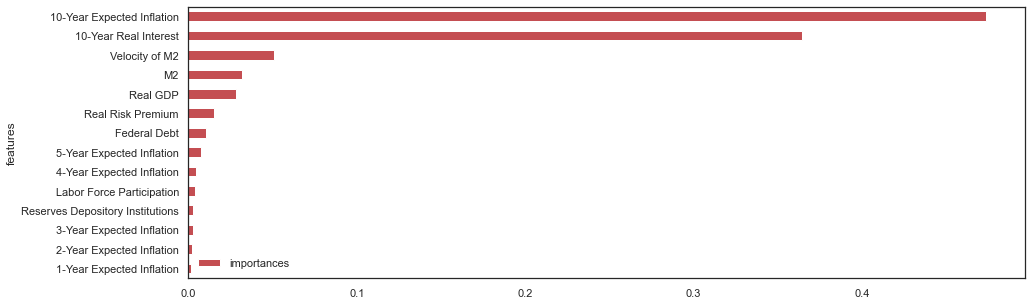

In [88]:
# Derive feature importance from Random Forest wit 100 trees
importances = rf100.feature_importances_
std         = np.std([tree.feature_importances_ for tree in rf100.estimators_], axis=0)
indices     = np.argsort(importances)[::-1]


# Barplot with feature importance
df = pd.DataFrame({'features':cols,'importances': importances})
df.sort_values('importances', inplace=True)
df.plot(kind='barh', y='importances', x='features', color='r', figsize=(15,5))

<AxesSubplot:ylabel='features'>

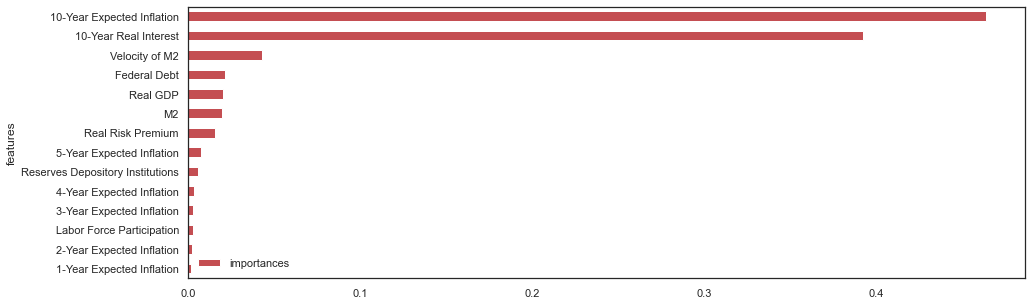

In [89]:
# Derive feature importance from Random Forest wit 500 trees
importances = rf500.feature_importances_
std         = np.std([tree.feature_importances_ for tree in rf500.estimators_], axis=0)
indices     = np.argsort(importances)[::-1]


# Barplot with feature importance
df = pd.DataFrame({'features':cols,'importances': importances})
df.sort_values('importances', inplace=True)
df.plot(kind='barh', y='importances', x='features', color='r', figsize=(15,5))

<AxesSubplot:ylabel='features'>

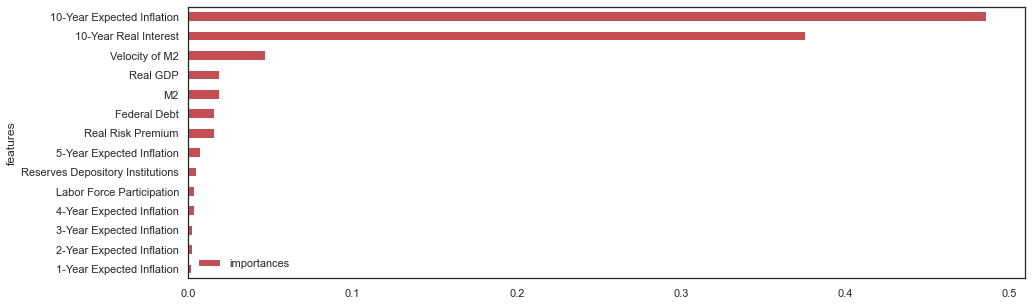

In [90]:
# Derive feature importance from Random Forest wit 1000 trees
importances = rf1000.feature_importances_
std         = np.std([tree.feature_importances_ for tree in rf1000.estimators_], axis=0)
indices     = np.argsort(importances)[::-1]


# Barplot with feature importance
df = pd.DataFrame({'features':cols,'importances': importances})
df.sort_values('importances', inplace=True)
df.plot(kind='barh', y='importances', x='features', color='r', figsize=(15,5))

### 5.7 XGBoost

#### 5.7.1 XGBoost tree based

In [91]:
# Create XGBoost model 
xgb_reg = xgb.XGBRegressor(booster='gbtree')
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [92]:
print ("Training Set Score R^2: {:.2f}".format(xgb_reg.score(X_train, y_train)))
print ("Test Set Score R^2: {:.2f}".format(xgb_reg.score(X_test, y_test)))

Training Set Score R^2: 1.00
Test Set Score R^2: 0.56


#### 5.7.2 XGBoost linear based

In [93]:
# Create XGBoost model 
xgb_lin = xgb.XGBRegressor(booster='gblinear')
xgb_lin.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None, gpu_id=-1,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=0,
             num_parallel_tree=None, predictor=None, random_state=0,
             reg_alpha=0, reg_lambda=0, ...)

In [94]:
print ("Training Set Score R^2: {:.2f}".format(xgb_lin.score(X_train, y_train)))
print ("Test Set Score R^2: {:.2f}".format(xgb_lin.score(X_test, y_test)))

Training Set Score R^2: 0.96
Test Set Score R^2: 0.88


#### 5.7.3 Feature importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

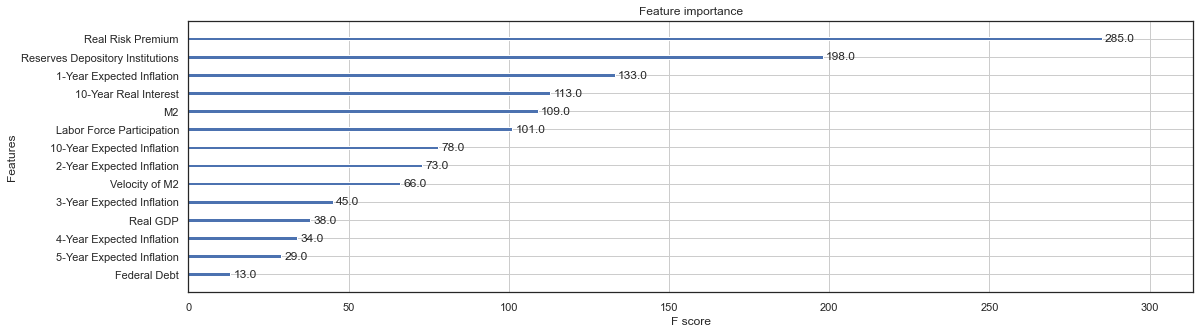

In [95]:
# Tree based importance
xgb.plot_importance(xgb_reg)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

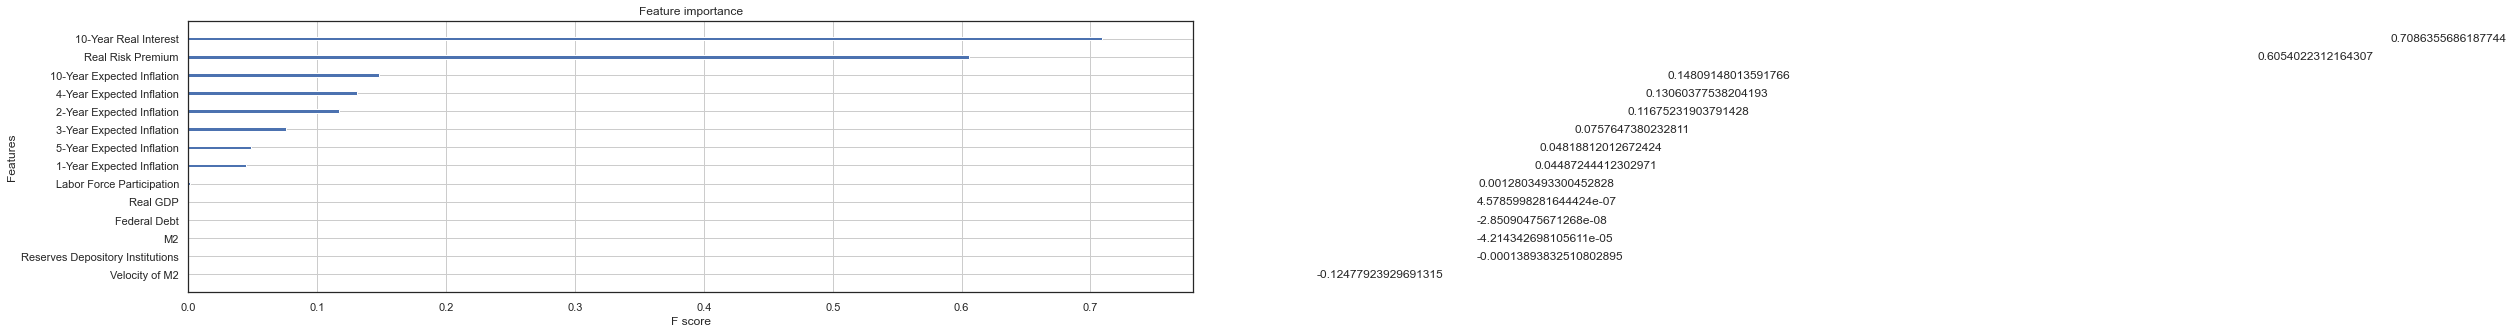

In [96]:
# Linear based importance
xgb.plot_importance(xgb_lin)

### 5.8 Pipeline

In [97]:
# Name of all the models
models = [
    ('Linear Regression', lr),
    ('Ridge, Alpha 0.1', rr),
    ('Ridge, Alpha 1', rr1),
    ('Ridge, Alpha 10', rr10),
    ('LassoCV', lasso),
    ('ElasticNetCV', encv),                            
    ('Decision Tree, maxDepth=3', reg_tree),
    ('Decision Tree, maxDepth=5', reg_tree5),
    ('Decision Tree, maxDepth=10', reg_tree10),
    ('Random Forest, trees=100', rf100),
    ('Random Forest, trees=500', rf500),
    ('Random Forest, trees=1000', rf1000),
    ('XGBOOst, Tree', xgb_reg),
    ('XGBOOst, Linear',xgb_lin)]

In [98]:
for name, model in models:
    pipelined_model = Pipeline([ 
                                 (name, model)
                            ])
    
    # Train the model
    pipelined_model.fit(X_train, y_train)

    # Predict the model
    y_hat = pipelined_model.predict(X_test)

    # Calculate metrics
    MAE = mean_absolute_error(y_test, y_hat)
    MSE = mean_squared_error(y_test, y_hat, squared=True)
    RMSE = mean_squared_error(y_test, y_hat, squared=False)
    MAPE = mean_absolute_percentage_error(y_test, y_hat)
    R2_train = pipelined_model.score(X_train, y_train)
    R2_test = r2_score(y_test, y_hat)
    print('Model: ', name, ' | R2 Train: ', R2_train)
    print('Model: ', name, ' | R2 Test: ', R2_test)
    print('Model: ', name, ' | MAE: ', MAE)
    print('Model: ', name, ' | MSE: ', MSE)
    print('Model: ', name, ' | RMSE: ', RMSE)
    print('Model: ', name, ' | MAPE: ', MAPE)
    print('----------------')

Model:  Linear Regression  | R2 Train:  0.9734964469001046
Model:  Linear Regression  | R2 Test:  -0.8015971366774384
Model:  Linear Regression  | MAE:  0.8215982528885888
Model:  Linear Regression  | MSE:  1.2193045949080992
Model:  Linear Regression  | RMSE:  1.1042212617533222
Model:  Linear Regression  | MAPE:  0.7151824728121007
----------------
Model:  Ridge, Alpha 0.1  | R2 Train:  0.9705888182104635
Model:  Ridge, Alpha 0.1  | R2 Test:  0.08328439899625928
Model:  Ridge, Alpha 0.1  | MAE:  0.6217534401163095
Model:  Ridge, Alpha 0.1  | MSE:  0.6204248007349749
Model:  Ridge, Alpha 0.1  | RMSE:  0.7876704899480333
Model:  Ridge, Alpha 0.1  | MAPE:  0.4957908713768893
----------------
Model:  Ridge, Alpha 1  | R2 Train:  0.9645655339488222
Model:  Ridge, Alpha 1  | R2 Test:  0.5312005488000959
Model:  Ridge, Alpha 1  | MAE:  0.4500728742028563
Model:  Ridge, Alpha 1  | MSE:  0.31727921481526006
Model:  Ridge, Alpha 1  | RMSE:  0.5632754342373365
Model:  Ridge, Alpha 1  | MAPE:  0

## <a id='regression_all'></a>
## 6. Creating Regression models with all the features

### Definition of variables, train-test splitting

In [99]:
y = df_forecast['Yield of the ten-year Treasury Notes']
X = df_forecast.drop('Yield of the ten-year Treasury Notes',1)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)

In [101]:
print('Number of training data:', len(X_train))
print('Number of test data:', len(X_test))

Number of training data: 181
Number of test data: 46


### 6.1 Linear Regression

In [102]:
# Create Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [103]:
print ("Training Set Score R^2: {:.2f}".format(lr.score(X_train, y_train)))
print ("Test Set Score R^2: {:.2f}".format(lr.score(X_test, y_test)))

Training Set Score R^2: 0.99
Test Set Score R^2: 0.13


#### 6.1.1 Feature importance

<AxesSubplot:ylabel='features'>

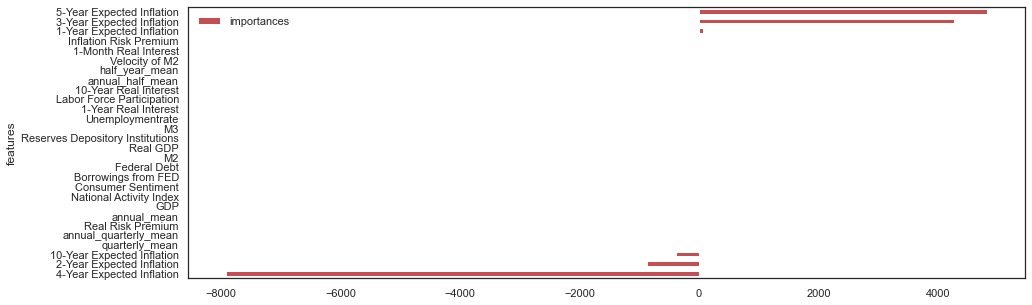

In [104]:
cols = X_train.columns

# Derive feature importance from Linear Regression
importances = lr.coef_
indices     = np.argsort(importances)[::-1]

# Barplot with feature importance
df = pd.DataFrame({'features':cols,'importances': importances})
df.sort_values('importances', inplace=True)
df.plot(kind='barh', y='importances', x='features', color='r', figsize=(15,5))

### 6.2 Ridge

#### 6.2.1 Rigde alpha 0.1

In [105]:
# Create Ridge model
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)

Ridge(alpha=0.01)

In [106]:
print ("Training Set Score R^2: {:.2f}".format(rr.score(X_train, y_train)))
print ("Test Set Score R^2: {:.2f}".format(rr.score(X_test, y_test)))

Training Set Score R^2: 0.99
Test Set Score R^2: 0.12


#### 6.2.2 Rigde alpha 1

In [107]:
# Create Ridge model
rr1 = Ridge(alpha=1)
rr1.fit(X_train, y_train)

Ridge(alpha=1)

In [108]:
print ("Training Set Score R^2: {:.2f}".format(rr1.score(X_train, y_train)))
print ("Test Set Score R^2: {:.2f}".format(rr1.score(X_test, y_test)))

Training Set Score R^2: 0.98
Test Set Score R^2: 0.13


#### 6.2.3 Rigde alpha 10

In [109]:
# Create Ridge model
rr10 = Ridge(alpha=10)
rr10.fit(X_train, y_train)

Ridge(alpha=10)

In [110]:
print ("Training Set Score R^2: {:.2f}".format(rr10.score(X_train, y_train)))
print ("Test Set Score R^2: {:.2f}".format(rr10.score(X_test, y_test)))

Training Set Score R^2: 0.97
Test Set Score R^2: 0.35


#### 6.2.4 Feature importance

In [111]:
cols = X_train.columns

<AxesSubplot:ylabel='features'>

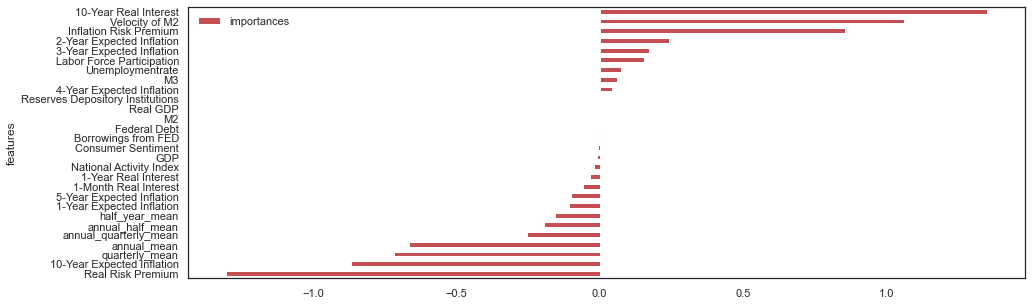

In [112]:
# Derive feature importance from Ridge with alpha 0.1
importances = rr.coef_
indices     = np.argsort(importances)[::-1]

# Barplot with feature importance
df = pd.DataFrame({'features':cols,'importances': importances})
df.sort_values('importances', inplace=True)
df.plot(kind='barh', y='importances', x='features', color='r', figsize=(15,5))

<AxesSubplot:ylabel='features'>

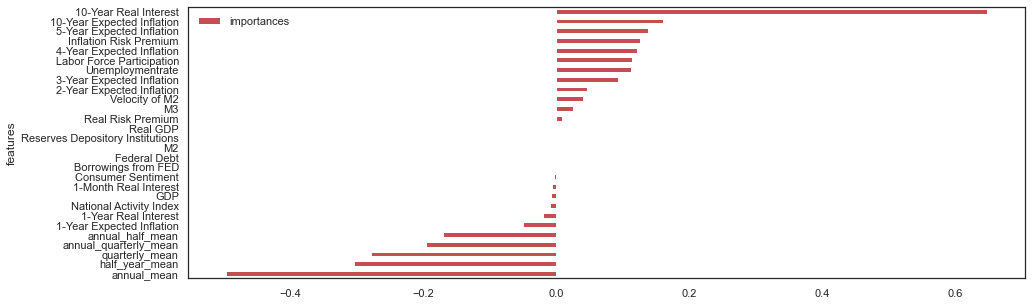

In [113]:
# Derive feature importance from Ridge with alpha 1
importances = rr1.coef_
indices     = np.argsort(importances)[::-1]

# Barplot with feature importance
df = pd.DataFrame({'features':cols,'importances': importances})
df.sort_values('importances', inplace=True)
df.plot(kind='barh', y='importances', x='features', color='r', figsize=(15,5))

<AxesSubplot:ylabel='features'>

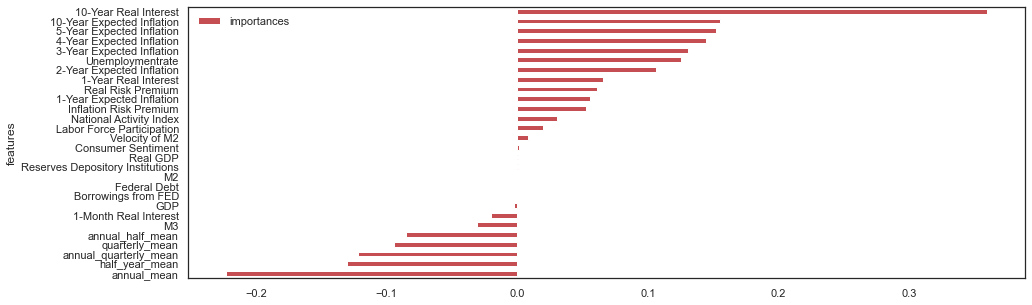

In [114]:
# Derive feature importance from Ridge with alpha 10
importances = rr10.coef_
indices     = np.argsort(importances)[::-1]

# Barplot with feature importance
df = pd.DataFrame({'features':cols,'importances': importances})
df.sort_values('importances', inplace=True)
df.plot(kind='barh', y='importances', x='features', color='r', figsize=(15,5))

### 6.3 LASSO

In [115]:
# Create LASSO model
lasso = make_pipeline(StandardScaler(), LassoCV())
lasso.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('lassocv', LassoCV())])

In [116]:
print ("Training Set Score R^2: {:.2f}".format(lasso.score(X_train, y_train)))
print ("Test Set Score R^2: {:.2f}".format(lasso.score(X_test, y_test)))

Training Set Score R^2: 0.98
Test Set Score R^2: 0.58


#### 6.3.1 Feature importance

In [117]:
lasso_cv_coef = lasso[-1].coef_

<AxesSubplot:ylabel='features'>

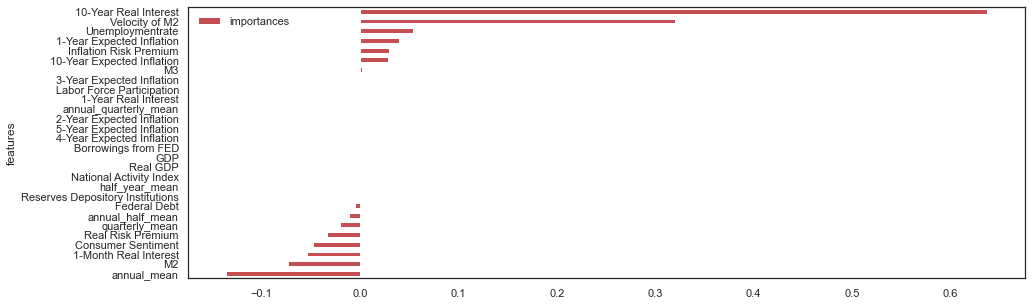

In [118]:
# Derive feature importance from LASSO
importances = lasso_cv_coef
indices     = np.argsort(importances)[::-1]

# Barplot with feature importance
df = pd.DataFrame({'features':cols,'importances': importances})
df.sort_values('importances', inplace=True)
df.plot(kind='barh', y='importances', x='features', color='r', figsize=(15,5))

### 6.4 Elastic Net

In [119]:
# Create Elastic Net model
encv = make_pipeline(StandardScaler(), ElasticNetCV())
encv.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('elasticnetcv', ElasticNetCV())])

In [120]:
print ("Training Set Score R^2: {:.2f}".format(encv.score(X_train, y_train)))
print ("Test Set Score R^2: {:.2f}".format(encv.score(X_test, y_test)))

Training Set Score R^2: 0.98
Test Set Score R^2: 0.57


#### 6.4.1 Feature importance

In [121]:
encv_cv_coef = encv[-1].coef_

<AxesSubplot:ylabel='features'>

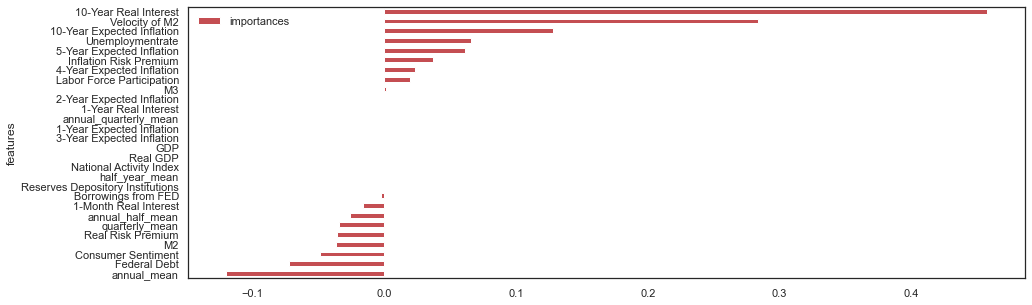

In [122]:
# Derive feature importance from Elastic Net
importances = encv_cv_coef
indices     = np.argsort(importances)[::-1]

# Barplot with feature importance
df = pd.DataFrame({'features':cols,'importances': importances})
df.sort_values('importances', inplace=True)
df.plot(kind='barh', y='importances', x='features', color='r', figsize=(15,5))

### 6.5 Decision Tree

#### 6.5.1 Decision Tree max_depth 3

In [123]:
# Create Decision Tree model
reg_tree = DecisionTreeRegressor(max_depth=3)

# Train Decision Tree Classifer
reg_tree = reg_tree.fit(X_train, y_train)

In [124]:
print ("Training Set Score R^2: {:.2f}".format(reg_tree.score(X_train, y_train)))
print ("Test Set Score R^2: {:.2f}".format(reg_tree.score(X_test, y_test)))

Training Set Score R^2: 0.96
Test Set Score R^2: 0.04


#### 6.5.2 Decision Tree max_depth 5

In [125]:
# Create Decision Tree model
reg_tree5 = DecisionTreeRegressor(max_depth=5)

# Train Decision Tree Classifer
reg_tree5 = reg_tree5.fit(X_train, y_train)

In [126]:
print ("Training Set Score R^2: {:.2f}".format(reg_tree5.score(X_train, y_train)))
print ("Test Set Score R^2: {:.2f}".format(reg_tree5.score(X_test, y_test)))

Training Set Score R^2: 0.99
Test Set Score R^2: -1.25


#### 6.5.3 Decision Tree max_depth 10

In [127]:
# Create Decision Tree model
reg_tree10 = DecisionTreeRegressor(max_depth=10)

# Train Decision Tree Classifer
reg_tree10 = reg_tree10.fit(X_train, y_train)

In [128]:
print ("Training Set Score R^2: {:.2f}".format(reg_tree10.score(X_train, y_train)))
print ("Test Set Score R^2: {:.2f}".format(reg_tree10.score(X_test, y_test)))

Training Set Score R^2: 1.00
Test Set Score R^2: 0.45


#### 6.5.4 Feature importance

In [129]:
cols = X_train.columns

<AxesSubplot:ylabel='features'>

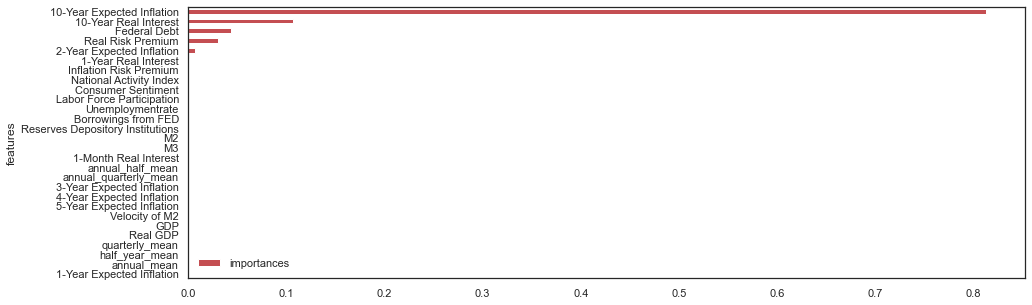

In [130]:
# Derive feature importance from Decison Tree with max_depth 3
importances = reg_tree.feature_importances_
indices     = np.argsort(importances)[::-1]

# Barplot with feature importance
df = pd.DataFrame({'features':cols,'importances': importances})
df.sort_values('importances', inplace=True)
df.plot(kind='barh', y='importances', x='features', color='r', figsize=(15,5))

<AxesSubplot:ylabel='features'>

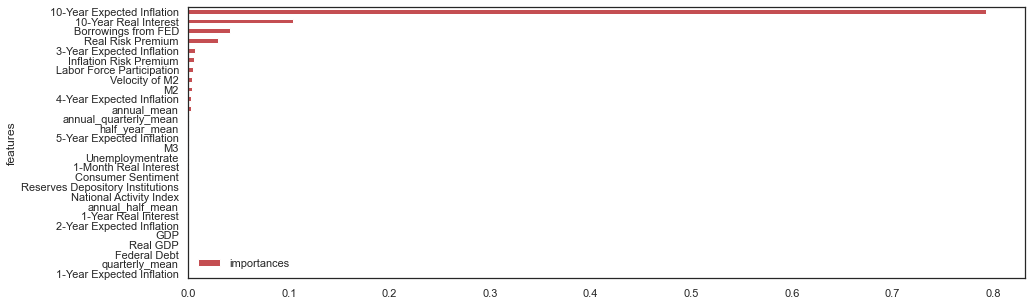

In [131]:
# Derive feature importance from Decison Tree with max_depth 5
importances = reg_tree5.feature_importances_
indices     = np.argsort(importances)[::-1]

# Barplot with feature importance
df = pd.DataFrame({'features':cols,'importances': importances})
df.sort_values('importances', inplace=True)
df.plot(kind='barh', y='importances', x='features', color='r', figsize=(15,5))

<AxesSubplot:ylabel='features'>

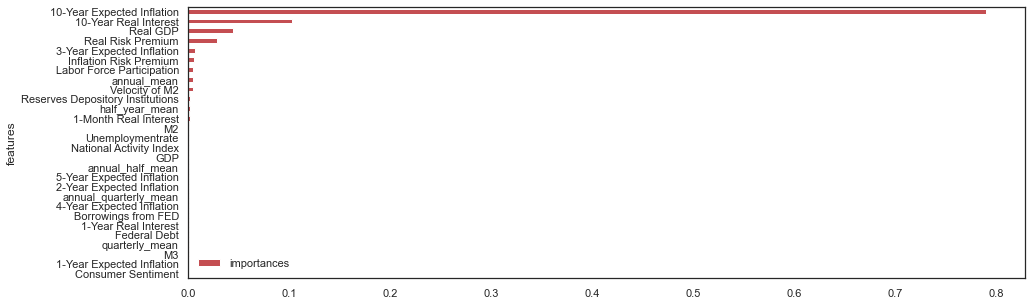

In [132]:
# Derive feature importance from Decison Tree with max_depth 10
importances = reg_tree10.feature_importances_
indices     = np.argsort(importances)[::-1]

# Barplot with feature importance
df = pd.DataFrame({'features':cols,'importances': importances})
df.sort_values('importances', inplace=True)
df.plot(kind='barh', y='importances', x='features', color='r', figsize=(15,5))

### 6.6 Random Forest

In [133]:
# Create Random Forest model
rf100 = RandomForestRegressor(n_estimators=100)
rf100.fit(X_train,y_train)

RandomForestRegressor()

In [134]:
print ("Training Set Score R^2: {:.2f}".format(rf100.score(X_train, y_train)))
print ("Test Set Score R^2: {:.2f}".format(rf100.score(X_test, y_test)))

Training Set Score R^2: 1.00
Test Set Score R^2: 0.32


#### 6.6.2 Random Forest with 500 trees

In [135]:
# Create Random Forest model
rf500 = RandomForestRegressor(n_estimators=500)
rf500.fit(X_train,y_train)

RandomForestRegressor(n_estimators=500)

In [136]:
print ("Training Set Score R^2: {:.2f}".format(rf500.score(X_train, y_train)))
print ("Test Set Score R^2: {:.2f}".format(rf500.score(X_test, y_test)))

Training Set Score R^2: 1.00
Test Set Score R^2: 0.29


#### 6.6.3 Random Forest with 1000 trees

In [137]:
# Create Random Forest model
rf1000 = RandomForestRegressor(n_estimators=1000)
rf1000.fit(X_train,y_train)

RandomForestRegressor(n_estimators=1000)

In [138]:
print ("Training Set Score R^2: {:.2f}".format(rf1000.score(X_train, y_train)))
print ("Test Set Score R^2: {:.2f}".format(rf1000.score(X_test, y_test)))

Training Set Score R^2: 1.00
Test Set Score R^2: 0.28


#### 6.6.4 Feature importance

In [139]:
cols = X_train.columns

<AxesSubplot:ylabel='features'>

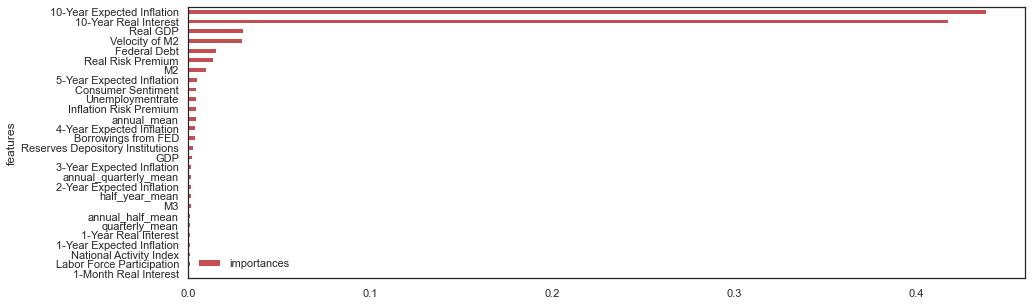

In [140]:
# Derive feature importance from Random Forest wit 100 trees
importances = rf100.feature_importances_
std         = np.std([tree.feature_importances_ for tree in rf100.estimators_], axis=0)
indices     = np.argsort(importances)[::-1]


# Barplot with feature importance
df = pd.DataFrame({'features':cols,'importances': importances})
df.sort_values('importances', inplace=True)
df.plot(kind='barh', y='importances', x='features', color='r', figsize=(15,5))

<AxesSubplot:ylabel='features'>

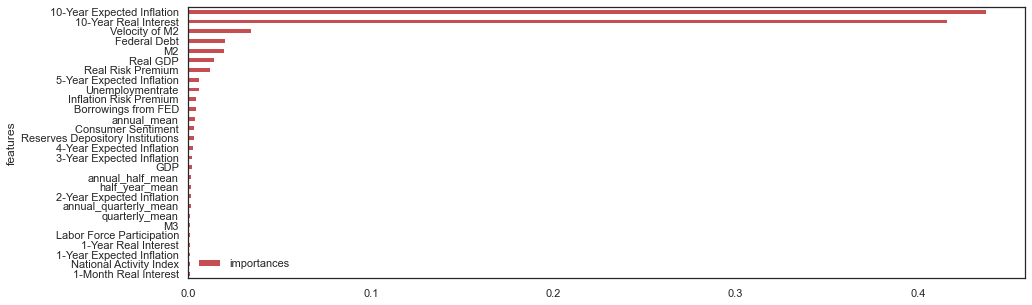

In [141]:
# Derive feature importance from Random Forest wit 500 trees
importances = rf500.feature_importances_
std         = np.std([tree.feature_importances_ for tree in rf500.estimators_], axis=0)
indices     = np.argsort(importances)[::-1]


# Barplot with feature importance
df = pd.DataFrame({'features':cols,'importances': importances})
df.sort_values('importances', inplace=True)
df.plot(kind='barh', y='importances', x='features', color='r', figsize=(15,5))

<AxesSubplot:ylabel='features'>

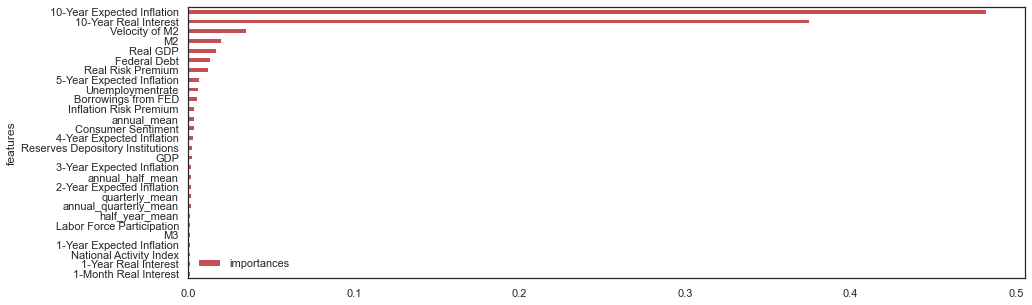

In [142]:
# Derive feature importance from Random Forest wit 1000 trees
importances = rf1000.feature_importances_
std         = np.std([tree.feature_importances_ for tree in rf1000.estimators_], axis=0)
indices     = np.argsort(importances)[::-1]


# Barplot with feature importance
df = pd.DataFrame({'features':cols,'importances': importances})
df.sort_values('importances', inplace=True)
df.plot(kind='barh', y='importances', x='features', color='r', figsize=(15,5))

### 6.7 XGBoost

#### 6.7.1 XGBoost tree based

In [143]:
# Create RXGBoost model 
xgb_reg = xgb.XGBRegressor(booster='gbtree')
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [144]:
print ("Training Set Score R^2: {:.2f}".format(xgb_reg.score(X_train, y_train)))
print ("Test Set Score R^2: {:.2f}".format(xgb_reg.score(X_test, y_test)))

Training Set Score R^2: 1.00
Test Set Score R^2: 0.55


#### 6.7.2 XGBoost linear based

In [145]:
# Create RXGBoost model 
xgb_lin = xgb.XGBRegressor(booster='gblinear')
xgb_lin.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None, gpu_id=-1,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=0,
             num_parallel_tree=None, predictor=None, random_state=0,
             reg_alpha=0, reg_lambda=0, ...)

In [146]:
print ("Training Set Score R^2: {:.2f}".format(xgb_lin.score(X_train, y_train)))
print ("Test Set Score R^2: {:.2f}".format(xgb_lin.score(X_test, y_test)))

Training Set Score R^2: 0.98
Test Set Score R^2: 0.97


#### 6.7.3 Feature importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

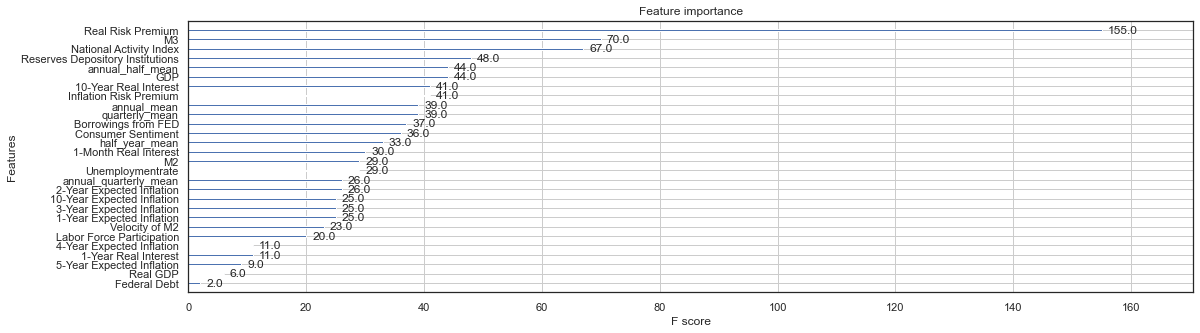

In [147]:
# Tree based importance
xgb.plot_importance(xgb_reg)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

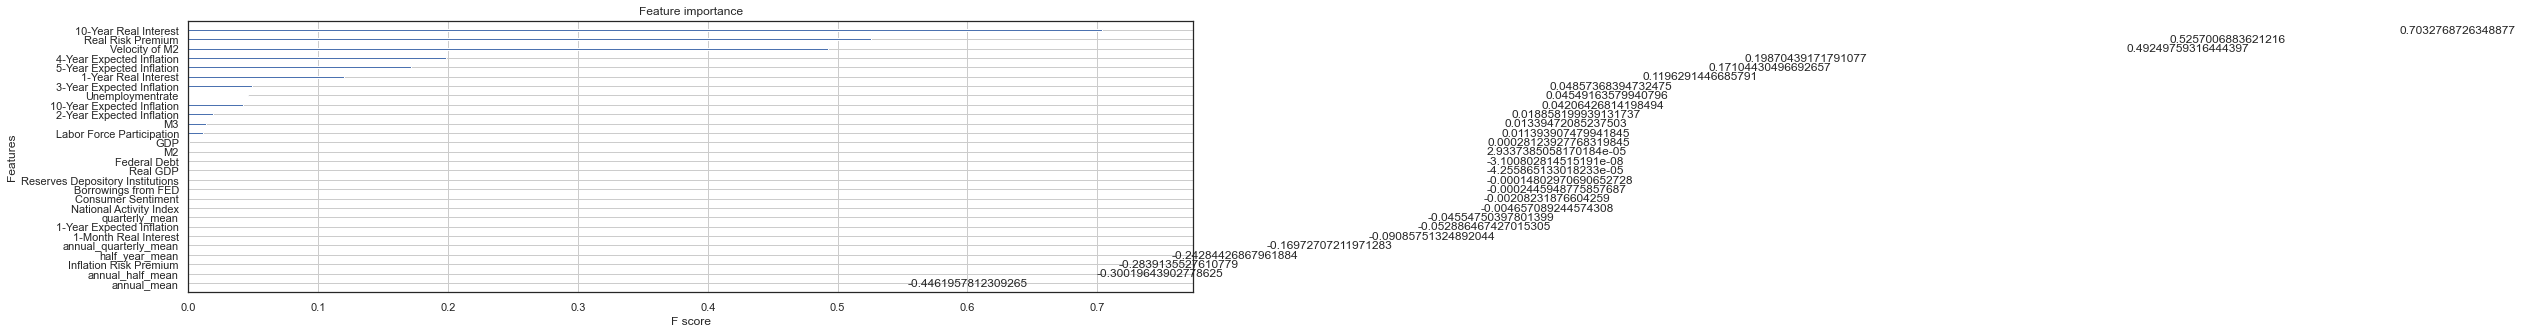

In [148]:
# Linear based importance
xgb.plot_importance(xgb_lin)

### 6.8 Pipeline

In [149]:
# Name of all the models
models = [
    ('Linear Regression', lr),
    ('Ridge, Alpha 0.1', rr),
    ('Ridge, Alpha 1', rr1),
    ('Ridge, Alpha 10', rr10),
    ('LassoCV', lasso),
    ('ElasticNetCV', encv),                            
    ('Decision Tree, maxDepth=3', reg_tree),
    ('Decision Tree, maxDepth=5', reg_tree5),
    ('Decision Tree, maxDepth=10', reg_tree10),
    ('Random Forest, trees=100', rf100),
    ('Random Forest, trees=500', rf500),
    ('Random Forest, trees=1000', rf1000),
    ('XGBOOst, Tree', xgb_reg),
    ('XGBOOst, Linear',xgb_lin)]

In [150]:
for name, model in models:
    pipelined_model = Pipeline([ 
                                 (name, model)
                            ])
    
    # Train the model
    pipelined_model.fit(X_train, y_train)

    # Predict the model
    y_hat = pipelined_model.predict(X_test)

    # Calculate metrics
    MAE = mean_absolute_error(y_test, y_hat)
    MSE = mean_squared_error(y_test, y_hat, squared=True)
    RMSE = mean_squared_error(y_test, y_hat, squared=False)
    MAPE = mean_absolute_percentage_error(y_test, y_hat)
    R2_train = pipelined_model.score(X_train, y_train)
    R2_test = r2_score(y_test, y_hat)
    print('Model: ', name, ' | R2 Train: ', R2_train)
    print('Model: ', name, ' | R2 Test: ', R2_test)
    print('Model: ', name, ' | MAE: ', MAE)
    print('Model: ', name, ' | MSE: ', MSE)
    print('Model: ', name, ' | RMSE: ', RMSE)
    print('Model: ', name, ' | MAPE: ', MAPE)
    print('----------------')

Model:  Linear Regression  | R2 Train:  0.9884199313085816
Model:  Linear Regression  | R2 Test:  0.13191778103567953
Model:  Linear Regression  | MAE:  0.6076937564807876
Model:  Linear Regression  | MSE:  0.5875101690565814
Model:  Linear Regression  | RMSE:  0.7664921193701743
Model:  Linear Regression  | MAPE:  0.5560464229526272
----------------
Model:  Ridge, Alpha 0.1  | R2 Train:  0.9869209761395171
Model:  Ridge, Alpha 0.1  | R2 Test:  0.11577994440048467
Model:  Ridge, Alpha 0.1  | MAE:  0.6344993070820644
Model:  Ridge, Alpha 0.1  | MSE:  0.5984321104610055
Model:  Ridge, Alpha 0.1  | RMSE:  0.7735839388592588
Model:  Ridge, Alpha 0.1  | MAPE:  0.5280607306914096
----------------
Model:  Ridge, Alpha 1  | R2 Train:  0.9837505386754265
Model:  Ridge, Alpha 1  | R2 Test:  0.13078825182201148
Model:  Ridge, Alpha 1  | MAE:  0.7019335067386976
Model:  Ridge, Alpha 1  | MSE:  0.5882746241793556
Model:  Ridge, Alpha 1  | RMSE:  0.7669906284820928
Model:  Ridge, Alpha 1  | MAPE:  0